In [1]:
# install.packages("BiocManager")
# install.packages("forcats")
# install.packages("stringr")
# install.packages("ggplot2")
# install.packages("ggrepel")
# install.packages("readr")
# install.packages("tidyr")
# install.packages("survminer")
# BiocManager::install("GEOquery")
# BiocManager::install("limma")
# BiocManager::install("pheatmap")
# BiocManager::install("org.Hs.eg.db")
# BiocManager::install("AnnotationHub")
# devtools::install_github("yanlinlin82/ggvenn")

In [4]:
library(GEOquery)
library(dplyr)
library(pheatmap)
library(ggplot2)
library(ggrepel)
library(ggrepel)
library(limma)

In [3]:
# gse <- getGEO("GSE109887")
gse <- getGEO("GSE97760")
gse <- gse[[1]]
gse

Found 1 file(s)

GSE97760_series_matrix.txt.gz



ExpressionSet (storageMode: lockedEnvironment)
assayData: 62976 features, 19 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM2577046 GSM2577047 ... GSM2577064 (19 total)
  varLabels: title geo_accession ... tissue:ch1 (40 total)
  varMetadata: labelDescription
featureData
  featureNames: 1 2 ... 62976 (62976 total)
  fvarLabels: ID COL ... SEQUENCE (19 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 25079797 
Annotation: GPL16699 

In [5]:
head(pData(gse)) ## print the sample information
head(fData(gse)) ## print the gene annotation
head(exprs(gse)) ## print the expression data

title           geo_accession status                submission_date
GSM2577046 C01 (Control 1) GSM2577046    Public on Apr 14 2017 Apr 13 2017    
GSM2577047 C02 (Control 2) GSM2577047    Public on Apr 14 2017 Apr 13 2017    
GSM2577048 C03 (Control 3) GSM2577048    Public on Apr 14 2017 Apr 13 2017    
GSM2577049 C04 (Control 4) GSM2577049    Public on Apr 14 2017 Apr 13 2017    
GSM2577050 C05 (Control 5) GSM2577050    Public on Apr 14 2017 Apr 13 2017    
GSM2577051 C06 (Control 6) GSM2577051    Public on Apr 14 2017 Apr 13 2017    
           last_update_date type channel_count source_name_ch1            
GSM2577046 Apr 14 2017      RNA  1             Peripheral blood, replica 1
GSM2577047 Apr 14 2017      RNA  1             Peripheral blood, replica 2
GSM2577048 Apr 14 2017      RNA  1             Peripheral blood, replica 3
GSM2577049 Apr 14 2017      RNA  1             Peripheral blood, replica 4
GSM2577050 Apr 14 2017      RNA  1             Peripheral blood, replica 5
GSM2577051 Apr 14 2017      RNA  1             Peripheral blood, replica 6
           organism_ch1 characteristics_ch1 ⋯ contact_address     contact_city
GSM2577046 Homo sapiens tissue: whole blood ⋯ 700 Children's Dive Columbus    
GSM2577047 Homo sapiens tissue: whole blood ⋯ 700 Children's Dive Columbus    
GSM2577048 Homo sapiens tissue: whole blood ⋯ 700 Children's Dive Columbus    
GSM2577049 Homo sapiens tissue: whole blood ⋯ 700 Children's Dive Columbus    
GSM2577050 Homo sapiens tissue: whole blood ⋯ 700 Children's Dive Columbus    
GSM2577051 Homo sapiens tissue: whole blood ⋯ 700 Children's Dive Columbus    
           contact_state contact_zip/postal_code contact_country
GSM2577046 Ohio          43205                   USA            
GSM2577047 Ohio          43205                   USA            
GSM2577048 Ohio          43205                   USA            
GSM2577049 Ohio          43205                   USA            
GSM2577050 Ohio          43205                   USA            
GSM2577051 Ohio          43205                   USA            
           supplementary_file                                                                                                          
GSM2577046 ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2577nnn/GSM2577046/suppl/GSM2577046_BGC_253949411394_S01_GE1_1010_Sep10_1_1.txt.gz
GSM2577047 ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2577nnn/GSM2577047/suppl/GSM2577047_BGC_253949411394_S01_GE1_1010_Sep10_1_2.txt.gz
GSM2577048 ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2577nnn/GSM2577048/suppl/GSM2577048_BGC_253949411394_S01_GE1_1010_Sep10_1_3.txt.gz
GSM2577049 ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2577nnn/GSM2577049/suppl/GSM2577049_BGC_253949411394_S01_GE1_1010_Sep10_1_4.txt.gz
GSM2577050 ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2577nnn/GSM2577050/suppl/GSM2577050_BGC_253949411394_S01_GE1_1010_Sep10_2_1.txt.gz
GSM2577051 ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2577nnn/GSM2577051/suppl/GSM2577051_BGC_253949411394_S01_GE1_1010_Sep10_2_2.txt.gz
           data_row_count disease:ch1 gender:ch1 tissue:ch1 
GSM2577046 62976          healthy     Female     whole blood
GSM2577047 62976          healthy     Female     whole blood
GSM2577048 62976          healthy     Female     whole blood
GSM2577049 62976          healthy     Female     whole blood
GSM2577050 62976          healthy     Female     whole blood
GSM2577051 62976          healthy     Female     whole blood

ID COL ROW NAME            SPOT_ID       CONTROL_TYPE REFSEQ    GB_ACC   
1 1  192 328 GE_BrightCorner CONTROL       pos                             
2 2  192 326 DarkCorner      CONTROL       pos                             
3 3  192 324 DarkCorner      CONTROL       pos                             
4 4  192 322 A_23_P117082    A_23_P117082  FALSE        NM_015987 NM_015987
5 5  192 320 A_33_P3246448   A_33_P3246448 FALSE        NM_080671 NM_080671
6 6  192 318 A_33_P3318220   A_33_P3318220 FALSE        NM_178466 NM_178466
  LOCUSLINK_ID GENE_SYMBOL
1     NA                  
2     NA                  
3     NA                  
4  50865       HEBP1      
5  23704       KCNE4      
6 128861       BPIFA3     
  GENE_NAME                                                     UNIGENE_ID
1                                                                         
2                                                                         
3                                                                         
4 heme binding protein 1                                        Hs.642618 
5 potassium voltage-gated channel, Isk-related family, member 4 Hs.348522 
6 BPI fold containing family A, member 3                        Hs.360989 
  ENSEMBL_ID     
1                
2                
3                
4 ENST00000014930
5 ENST00000281830
6 ENST00000375454
  ACCESSION_STRING                                                   
1                                                                    
2                                                                    
3                                                                    
4 ref|NM_015987|ens|ENST00000014930|gb|AF117615|gb|BC016277          
5 ref|NM_080671|ens|ENST00000281830|tc|THC2655788                    
6 ref|NM_178466|ens|ENST00000375454|ens|ENST00000471233|tc|THC2478474
  CHROMOSOMAL_LOCATION     CYTOBAND   
1                                     
2                                     
3                                     
4 chr12:13127906-13127847  hs|12p13.1 
5 chr2:223920197-223920256 hs|2q36.1  
6 chr20:31812208-31812267  hs|20q11.21
  DESCRIPTION                                                                                         
1                                                                                                     
2                                                                                                     
3                                                                                                     
4 Homo sapiens heme binding protein 1 (HEBP1), mRNA [NM_015987]                                       
5 Homo sapiens potassium voltage-gated channel, Isk-related family, member 4 (KCNE4), mRNA [NM_080671]
6 Homo sapiens BPI fold containing family A, member 3 (BPIFA3), transcript variant 1, mRNA [NM_178466]
  GO_ID                                                                                                                                                                                                                                                     
1                                                                                                                                                                                                                                                           
2                                                                                                                                                                                                                                                           
3                                                                                                                                                                                                                                                           
4 GO:0005488(binding)|GO:0005576(extracellular region)|GO:0005737(cytoplasm)|GO:0005739(mitochondrion)|GO:0005829(cytosol)|GO:0007623(

GSM2577046   GSM2577047   GSM2577048   GSM2577049   GSM2577050   GSM2577051  
1 33181.550000 49520.940000 50023.360000 41629.540000 37781.120000 42705.820000
2     5.364813     4.804876     2.835370     2.883890     5.122675     5.794186
3     3.492812     2.961108     2.831589     2.812466     5.109030     3.009590
4  5707.768000  5406.449000  9125.072000  3406.203000  5486.674000  1145.657000
5    44.433410    29.937000    25.510370    19.807860    19.198260    22.909000
6    15.834100     6.869918     2.821171     4.072257     5.071608     9.110302
  GSM2577052   GSM2577053  GSM2577054   GSM2577055   GSM2577056   GSM2577057  
1 58873.800000 2705.133000 2.162827e+05 1.963772e+05 21925.740000 13915.930000
2     5.252259    8.463166 3.113753e+01 3.060319e+00     2.869777     3.509999
3     4.020053    8.878076 3.212453e+00 3.082000e+00     2.899134     3.522487
4  5371.601000   37.394170 9.554142e+03 1.058576e+04  2865.643000  3058.495000
5    27.113870   27.729230 1.427192e+01 2.344990e+01    12.930570    11.844170
6     3.967033    4.385476 3.170062e+00 3.139426e+00     2.974802     3.553697
  GSM2577058   GSM2577059   GSM2577060   GSM2577061   GSM2577062   GSM2577063  
1 51059.640000 61515.760000 26450.900000 56273.350000 90606.520000 68308.840000
2     2.366828     3.138207     2.445099     5.170928     3.530640     3.531176
3     2.379737     3.165075     2.434706     3.024729     3.493796     2.406369
4  2060.921000  3106.522000   535.301600  1799.495000  5192.984000  3211.859000
5    15.079730     9.081751    17.725830    19.819870     9.183207    23.534980
6     2.412916     4.161552     2.402280     2.984531     4.337301     2.473950
  GSM2577064  
1 67109.260000
2     3.305930
3     3.313705
4  2530.404000
5     3.325314
6     3.329537

In [6]:
summary(exprs(gse))
## calculate median expression level
cutoff <- median(exprs(gse))
## TRUE or FALSE for whether each gene is "expressed" in each sample
is_expressed <- exprs(gse) > cutoff

## Identify genes expressed in more than 2 samples
keep <- rowSums(is_expressed) > 2
## check how many genes are removed / retained.
table(keep)
## subset to just those expressed genes
gse <- gse[keep,]

   GSM2577046         GSM2577047         GSM2577048         GSM2577049      
 Min.   :     3.5   Min.   :     2.3   Min.   :     2.4   Min.   :     2.0  
 1st Qu.:     4.2   1st Qu.:     6.1   1st Qu.:     3.4   1st Qu.:     3.5  
 Median :    39.6   Median :    41.9   Median :    28.6   Median :    26.7  
 Mean   :  2584.3   Mean   :  2161.1   Mean   :  1476.1   Mean   :  1815.9  
 3rd Qu.:   361.8   3rd Qu.:   316.2   3rd Qu.:   212.5   3rd Qu.:   251.4  
 Max.   :555202.4   Max.   :522297.5   Max.   :509575.9   Max.   :604070.9  
   GSM2577050         GSM2577051         GSM2577052         GSM2577053      
 Min.   :     3.9   Min.   :     3.0   Min.   :     3.0   Min.   :     2.9  
 1st Qu.:     5.2   1st Qu.:     3.0   1st Qu.:     4.5   1st Qu.:     3.3  
 Median :    39.2   Median :    23.7   Median :    40.4   Median :    27.1  
 Mean   :  1950.5   Mean   :  1343.8   Mean   :  2616.7   Mean   :  1447.8  
 3rd Qu.:   287.6   3rd Qu.:   166.8   3rd Qu.:   414.1   3rd Qu.:   192.5  

keep
FALSE  TRUE 
25135 37841 

In [7]:
anno <- fData(gse)
data <- exprs(gse)
sampleMeta <- pData(gse)

In [8]:
tryCatch({
        print(length(unique(anno$GENE_SYMBOL)))
        print(length(anno[,1]))

        counts <- dplyr::count(anno, GENE_SYMBOL, sort=TRUE)
        head(counts[counts$n != 1,])

        uniqueGenes = counts[counts$n == 1,]$GENE_SYMBOL

        data <- data[anno$GENE_SYMBOL %in% uniqueGenes,]
        anno <- anno[anno$GENE_SYMBOL %in% uniqueGenes,]
        rownames(data) <- anno$GENE_SYMBOL
        data <- log2(data)
    },
    error=function(cond) {
        print('No GENE_SYMBOL presented')
})

anno <- tryCatch({
        tmp <- select(anno, GENE_SYMBOL)
        rename(tmp, ID=GENE_SYMBOL)
    },
    error=function(cond) {
        return(select(anno, ID))
})

[1] 20667
[1] 37841


In [9]:
sampleInfo <- tryCatch(
    {
        sampleInfo <- select(sampleMeta, `gender:ch1`, `disease state:ch1`, `age:ch1`)
        sampleInfo <- rename(
            sampleInfo,
            gender=`gender:ch1`, condition=`disease state:ch1`, above82=`age:ch1`)
        sampleInfo$above82 <- as.numeric(sampleInfo$above82 > 82)
        sampleInfo
    },
    error=function(cond) {
        sampleInfo <- select(sampleMeta, `gender:ch1`, `disease:ch1`)
        sampleInfo <- rename(
            sampleInfo,
            gender=`gender:ch1`, condition=`disease:ch1`)
        return(sampleInfo)
    })

head(sampleInfo)

gender condition
GSM2577046 Female healthy  
GSM2577047 Female healthy  
GSM2577048 Female healthy  
GSM2577049 Female healthy  
GSM2577050 Female healthy  
GSM2577051 Female healthy

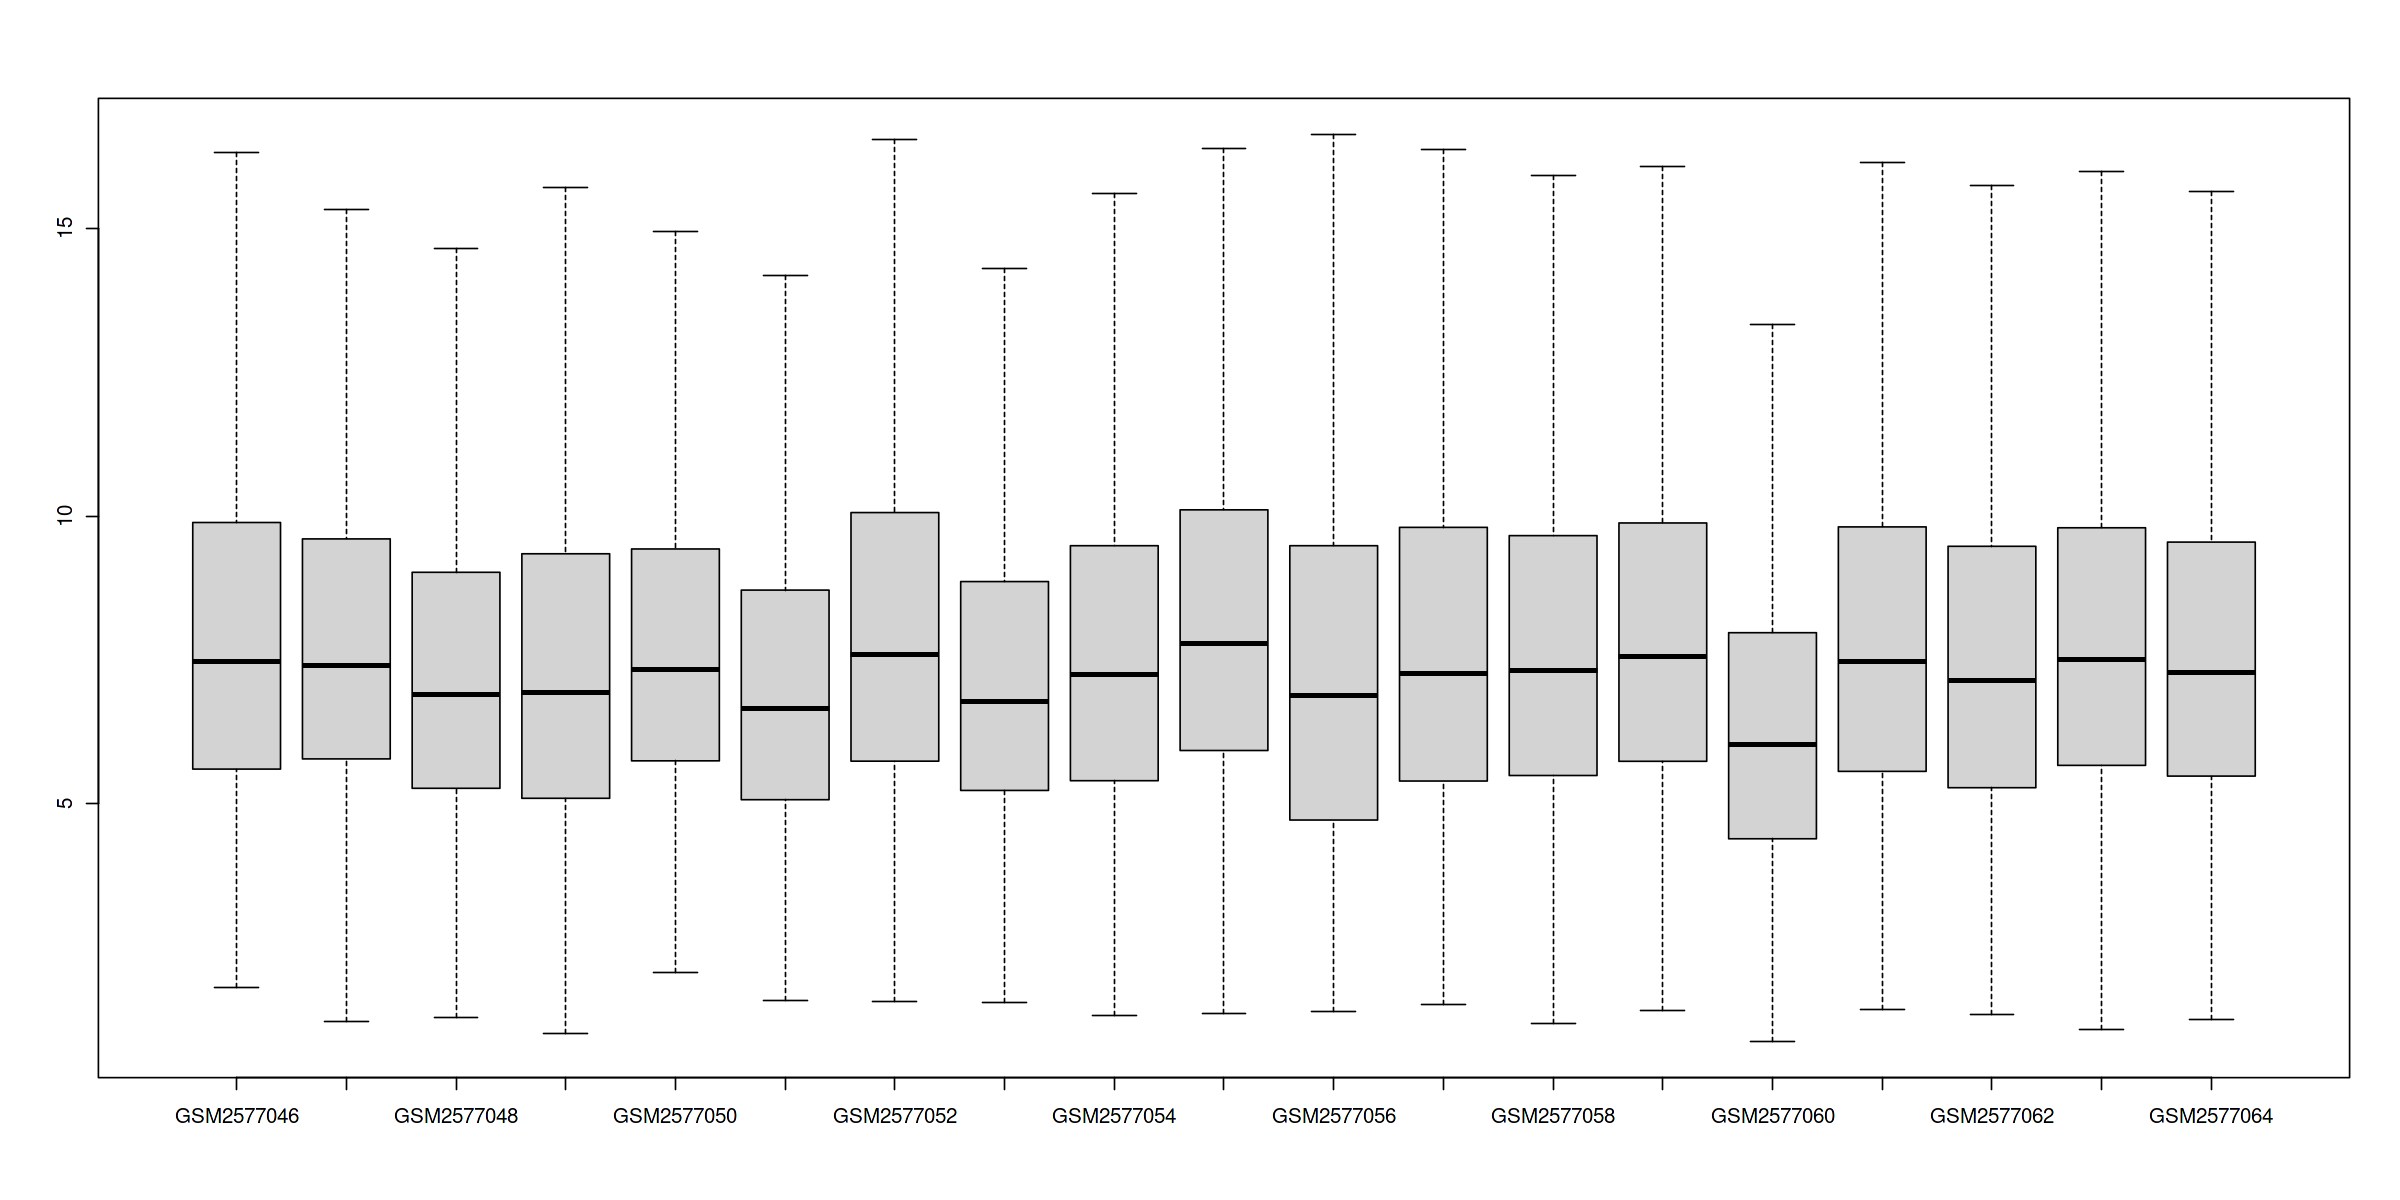

In [10]:
## exprs get the expression levels as a data frame and get the distribution
options(repr.plot.width=20, repr.plot.height=10)
boxplot(data,outline=FALSE)

### Data not in $log_2$ scale

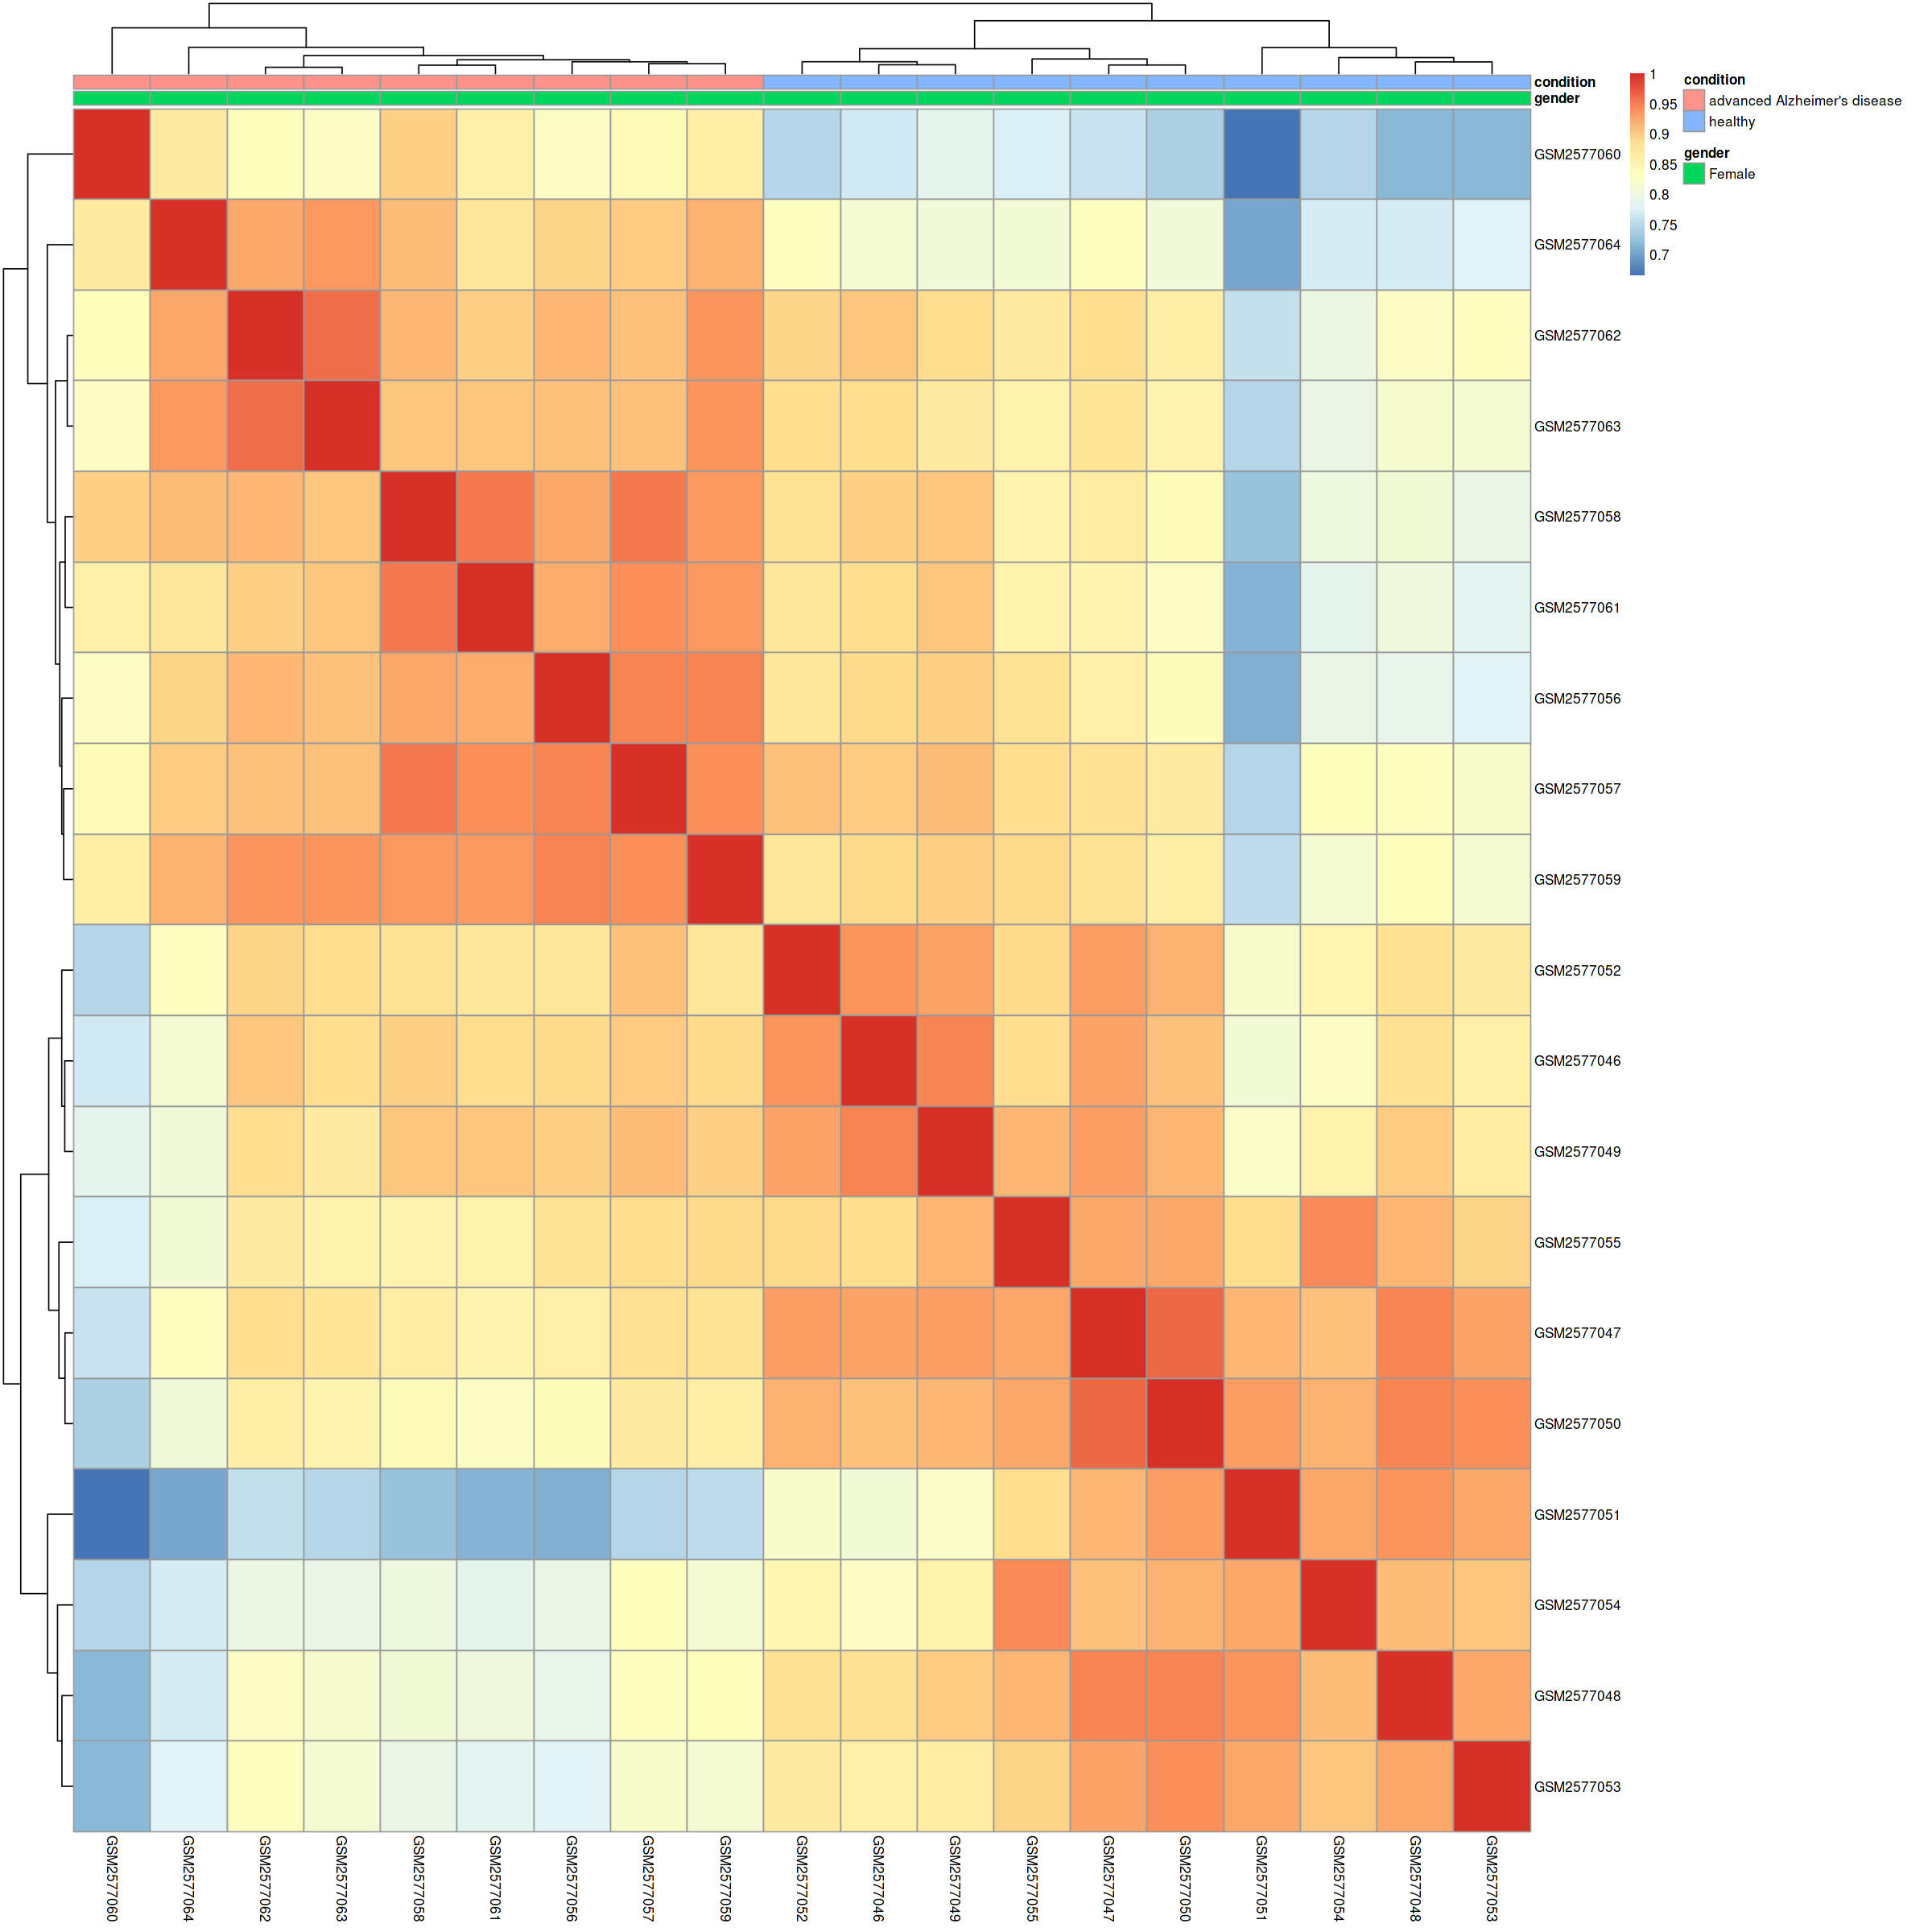

In [11]:
options(repr.plot.width=20, repr.plot.height=20)
corMatrix <- cor(data, use="c")
rownames(sampleInfo) <- colnames(corMatrix)
pheatmap(corMatrix,
         annotation_col=sampleInfo)

In [12]:
sampleInfo$rname <- row.names(sampleInfo)

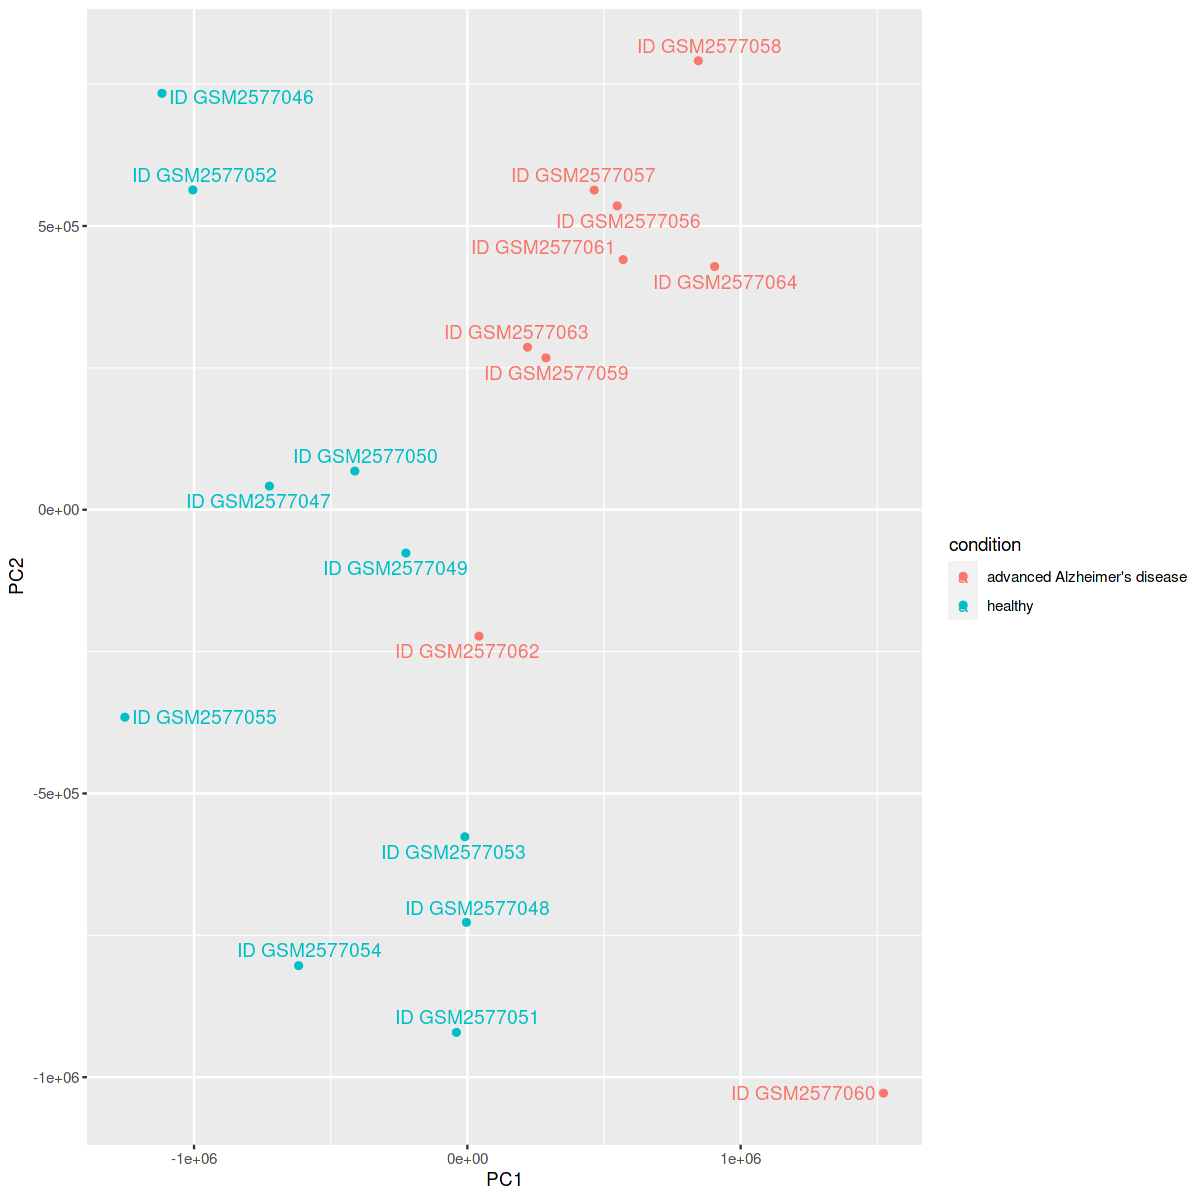

In [13]:
pca <- prcomp(t(exprs(gse)))
# sampleInfo <- cbind(sampleInfo, select(sampleMeta, `age:ch1`))
# sampleInfo <- rename(sampleInfo, age=`age:ch1`)
## Join the PCs to the sample information
options(repr.plot.width=10, repr.plot.height=10)
cbind(sampleInfo, pca$x) %>% ggplot(aes(x=PC1, y=PC2, col=condition, label=paste("ID", rname))) + geom_point() + geom_text_repel()

In [14]:
design <- model.matrix(~0+sampleInfo$condition)
colnames(design) <- c("AD","Control")

### Filter out low-expressed genes:

In [15]:
fit <- lmFit(data, design)
head(fit$coefficients)

AD        Control  
IRG1          5.114311  6.315863
SNAR-G2       7.848120  6.904633
MBNL3        10.741877 11.628616
HOXC4         8.201710  6.461069
LOC100129203  7.947417  6.852937
PHLPP1        4.606562  4.270001

In [16]:
contrasts <- makeContrasts(AD - Control, levels=design)

## can define multiple contrasts
## e.g. makeContrasts(Group1 - Group2, Group2 - Group3,....levels=design)

fit2 <- contrasts.fit(fit, contrasts)
fit2 <- eBayes(fit2)
topTable(fit2)

logFC     AveExpr   t         P.Value      adj.P.Val    B       
IQCJ           -4.112482  3.762115 -13.52601 4.012133e-13 3.456144e-09 19.72236
XLOC_l2_015885  7.955817 12.237530  13.10744 8.103195e-13 3.456144e-09 19.07696
XLOC_014096    -4.479367  5.036511 -13.07260 8.597885e-13 3.456144e-09 19.02238
XLOC_l2_010697 -5.238949  5.169939 -13.02621 9.305720e-13 3.456144e-09 18.94948
HAPLN2          7.883333  8.523271  12.78087 1.418966e-12 4.216030e-09 18.55992
Q3KR39         -5.404292 10.983555 -12.63371 1.832882e-12 4.538216e-09 18.32296
XLOC_l2_012570 -4.199763  4.245869 -12.21622 3.834760e-12 8.138456e-09 17.63698
XLOC_005485    -5.167681  5.738550 -11.96441 6.038939e-12 1.121431e-08 17.21319
CYP2F1         -5.127157  7.594835 -11.52135 1.365303e-11 2.253660e-08 16.44866
LOC100129931   -5.130638  8.029526 -11.32614 1.969373e-11 2.925701e-08 16.10400

In [17]:
table(decideTests(fit2))


   -1     0     1 
 2453 10078  2325 

In [18]:
fit2$genes <- anno
topTable(fit2)
full_results <- topTable(fit2, number=Inf)
full_results <- tibble::rownames_to_column(full_results, "id")

ID             logFC     AveExpr   t         P.Value     
IQCJ           IQCJ           -4.112482  3.762115 -13.52601 4.012133e-13
XLOC_l2_015885 XLOC_l2_015885  7.955817 12.237530  13.10744 8.103195e-13
XLOC_014096    XLOC_014096    -4.479367  5.036511 -13.07260 8.597885e-13
XLOC_l2_010697 XLOC_l2_010697 -5.238949  5.169939 -13.02621 9.305720e-13
HAPLN2         HAPLN2          7.883333  8.523271  12.78087 1.418966e-12
Q3KR39         Q3KR39         -5.404292 10.983555 -12.63371 1.832882e-12
XLOC_l2_012570 XLOC_l2_012570 -4.199763  4.245869 -12.21622 3.834760e-12
XLOC_005485    XLOC_005485    -5.167681  5.738550 -11.96441 6.038939e-12
CYP2F1         CYP2F1         -5.127157  7.594835 -11.52135 1.365303e-11
LOC100129931   LOC100129931   -5.130638  8.029526 -11.32614 1.969373e-11
               adj.P.Val    B       
IQCJ           3.456144e-09 19.72236
XLOC_l2_015885 3.456144e-09 19.07696
XLOC_014096    3.456144e-09 19.02238
XLOC_l2_010697 3.456144e-09 18.94948
HAPLN2         4.216030e-09 18.55992
Q3KR39         4.538216e-09 18.32296
XLOC_l2_012570 8.138456e-09 17.63698
XLOC_005485    1.121431e-08 17.21319
CYP2F1         2.253660e-08 16.44866
LOC100129931   2.925701e-08 16.10400

In [19]:
p_cutoff <- 0.01
fc_cutoff <- 1.25
topN <- 20

full_results %>% 
  mutate(Significant = adj.P.Val < p_cutoff & abs(logFC) > fc_cutoff ) %>% 
  mutate(Rank = 1:n(), Label = ifelse(Rank < topN, ID,"")) %>% 
  ggplot(aes(x = logFC, y = B, col=Significant, label=Label)) + geom_point() + geom_text_repel(col="black")

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [20]:
# filter according to p-value (adjusted) and fold-change cut-offs
p_cutoff <- 0.01
fc_cutoff <- 1.25

head(filter(full_results, adj.P.Val < 0.05, abs(logFC) > 1))

# These results can be exported with the write_csv function.
library(readr)
filter(full_results, adj.P.Val < 0.05, abs(logFC) > 1) %>%
  write_csv("filtered_de_results.csv")

id             ID             logFC     AveExpr   t         P.Value     
1 IQCJ           IQCJ           -4.112482  3.762115 -13.52601 4.012133e-13
2 XLOC_l2_015885 XLOC_l2_015885  7.955817 12.237530  13.10744 8.103195e-13
3 XLOC_014096    XLOC_014096    -4.479367  5.036511 -13.07260 8.597885e-13
4 XLOC_l2_010697 XLOC_l2_010697 -5.238949  5.169939 -13.02621 9.305720e-13
5 HAPLN2         HAPLN2          7.883333  8.523271  12.78087 1.418966e-12
6 Q3KR39         Q3KR39         -5.404292 10.983555 -12.63371 1.832882e-12
  adj.P.Val    B       
1 3.456144e-09 19.72236
2 3.456144e-09 19.07696
3 3.456144e-09 19.02238
4 3.456144e-09 18.94948
5 4.216030e-09 18.55992
6 4.538216e-09 18.32296

In [21]:
## Use to top 20 genes for illustration

topN <- 10
##
gene_names <- mutate(full_results, Rank = 1:n() + 1) %>% 
  filter(Rank < topN) %>% 
  pull(ID) 

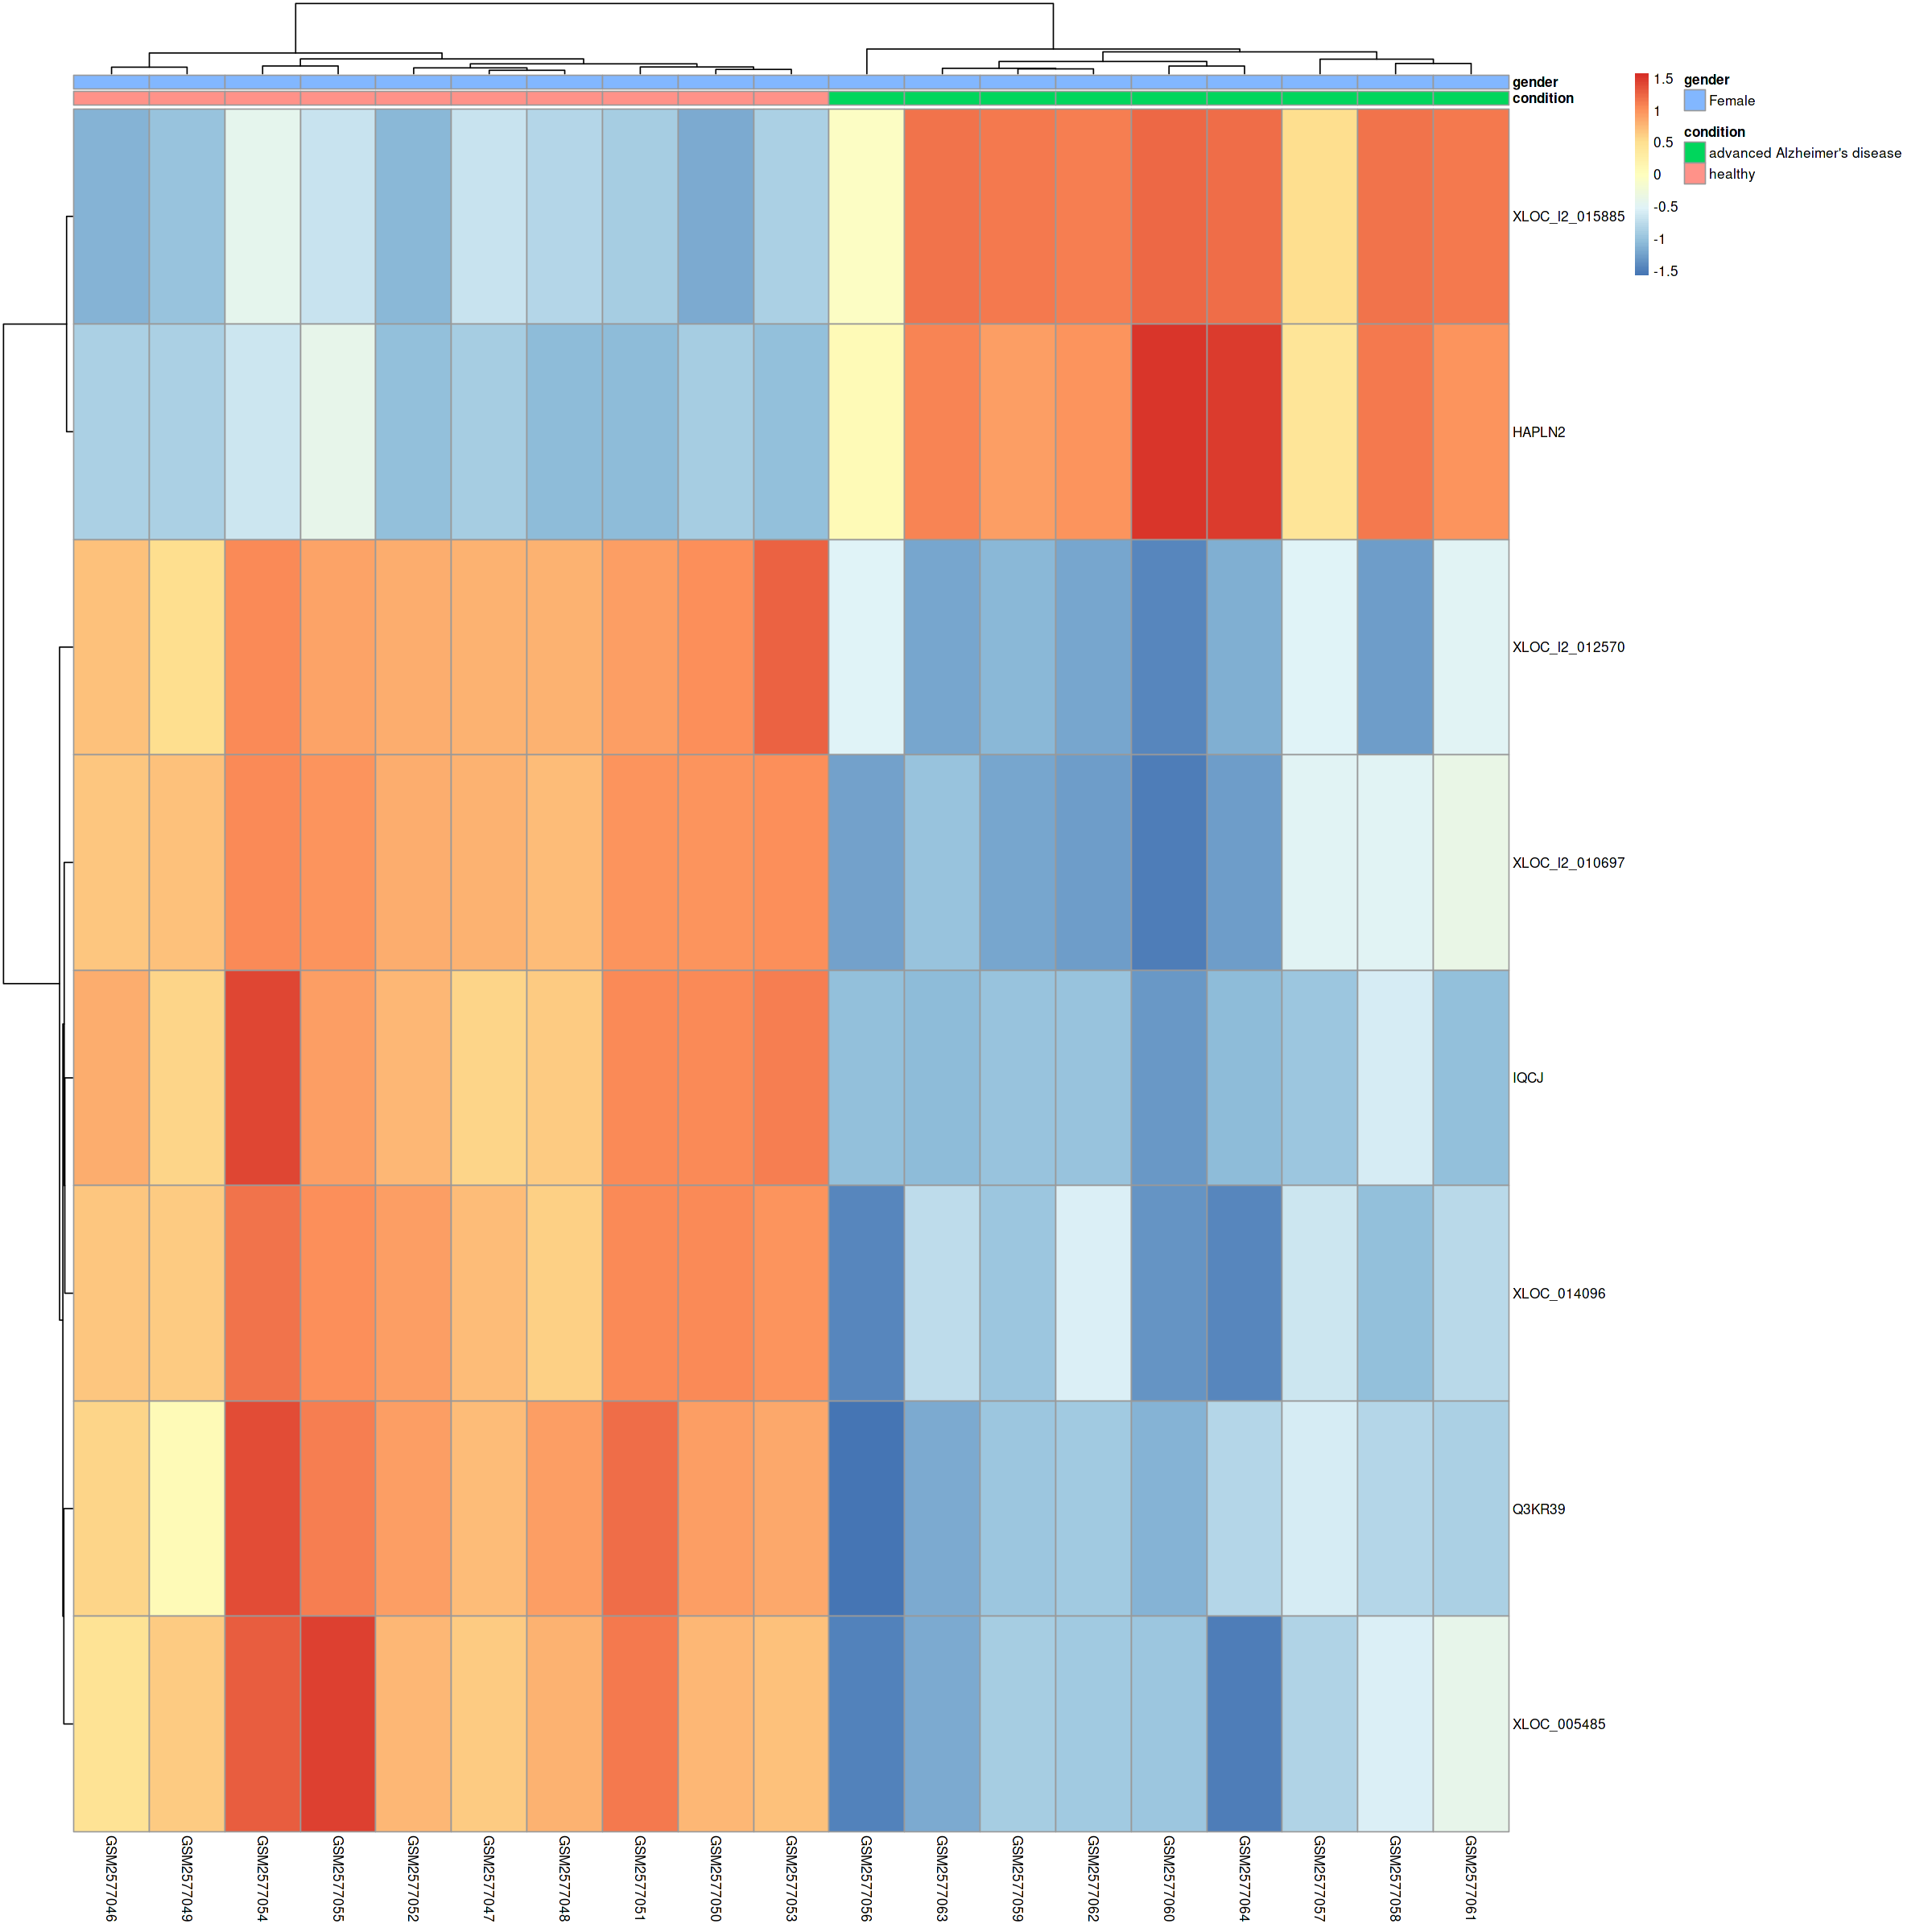

In [22]:
## Get the rows corresponding to ids_of_interest and all columns
gene_matrix <- data[gene_names,]
options(repr.plot.width=20, repr.plot.height=20)
pheatmap(
    gene_matrix,
    labels_row=gene_names,
    annotation_col=select(sampleInfo, condition, gender),
    scale="row")

# GO enrichment

In [67]:
library(AnnotationHub)
library(clusterProfiler)

In [68]:
ah <- AnnotationHub()
query(ah, "EnsDb.Hsapiens.v101")
edb <- ah[["AH83216"]]
txs <- transcripts(edb, columns = c("tx_id", "gene_name", "gene_id"))

snapshotDate(): 2021-10-20



AnnotationHub with 1 record
# snapshotDate(): 2021-10-20
# names(): AH83216
# $dataprovider: Ensembl
# $species: Homo sapiens
# $rdataclass: EnsDb
# $rdatadateadded: 2020-04-27
# $title: Ensembl 101 EnsDb for Homo sapiens
# $description: Gene and protein annotations for Homo sapiens based on Ensem...
# $taxonomyid: 9606
# $genome: GRCh38
# $sourcetype: ensembl
# $sourceurl: http://www.ensembl.org
# $sourcesize: NA
# $tags: c("101", "AHEnsDbs", "Annotation", "EnsDb", "Ensembl", "Gene",
#   "Protein", "Transcript") 
# retrieve record with 'object[["AH83216"]]' 

loading from cache



In [69]:
gene_names <- full_results %>% dplyr::filter(P.Value < .01 & abs(logFC) > 1.25) %>% pull(ID)
length(gene_names)

[1] 3564

In [70]:
ego <- enrichGO(gene          = gene_id,
                OrgDb         = 'org.Hs.eg.db',
                keyType       = 'ENSEMBL',
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

head(within(ego@result, rm(geneID)))
goplot(ego)

ID         Description                    GeneRatio BgRatio 
GO:0005833 GO:0005833 hemoglobin complex             3/113     12/21916
GO:0031838 GO:0031838 haptoglobin-hemoglobin complex 2/113     11/21916
GO:0043186 GO:0043186 P granule                      2/113     20/21916
GO:0060293 GO:0060293 germ plasm                     2/113     20/21916
GO:0045495 GO:0045495 pole plasm                     2/113     21/21916
GO:0034707 GO:0034707 chloride channel complex       2/113     59/21916
           pvalue       p.adjust    qvalue      Count
GO:0005833 2.838488e-05 0.003576495 0.003576495 3    
GO:0031838 1.405905e-03 0.088571989 0.088571989 2    
GO:0043186 4.711866e-03 0.130797839 0.130797839 2    
GO:0060293 4.711866e-03 0.130797839 0.130797839 2    
GO:0045495 5.190390e-03 0.130797839 0.130797839 2    
GO:0034707 3.725965e-02 0.619058924 0.619058924 2

ERROR: Error in anc[[i]]: subscript out of bounds


# WGCNA

In [72]:
library(DESeq2)
library(tidyr)

In [74]:
library(WGCNA);
options(stringsAsFactors = FALSE);

In [76]:
head(data) ## print the expression data

GSM2577046 GSM2577047 GSM2577048 GSM2577049 GSM2577050 GSM2577051
IRG1          6.462623   6.389703   6.424973   6.179820   6.313768   6.572935 
SNAR-G2       9.114378   7.641657   6.947721   7.346307   8.272123   6.199063 
MBNL3        11.732499  12.098657  13.117735  12.199979  11.673815  11.339248 
HOXC4         7.792706   5.988226   6.973969   6.739905   7.593405   4.865704 
LOC100129203  7.330246   6.905256   6.428880   6.888371   7.133613   6.173691 
PHLPP1        5.642387   4.338421   3.783878   3.812259   4.804250   1.677004 
             GSM2577052 GSM2577053 GSM2577054 GSM2577055 GSM2577056 GSM2577057
IRG1          6.590935  4.119291    6.860604   7.243981  5.277599    5.223285 
SNAR-G2       7.515395  3.625573    6.237580   6.146536  6.806813    7.728887 
MBNL3        12.606527  5.467267   12.423044  13.627387  9.805327   10.909456 
HOXC4         7.120236  2.830888    7.194820   7.510832  7.572437    8.280960 
LOC100129203  7.612433  4.808461    7.682094   7.566324  8.283838    8.840128 
PHLPP1        5.246141  3.676322    4.363795   5.355559  4.545711    4.304575 
             GSM2577058 GSM2577059 GSM2577060 GSM2577061 GSM2577062 GSM2577063
IRG1          5.404392   6.273222   4.204266   5.708226   3.889227   5.869219 
SNAR-G2       7.676170   7.356160   8.878766   9.541027   7.589225   7.946725 
MBNL3        10.314193  11.421609  10.657259  11.030998  10.887194  10.806154 
HOXC4         7.939855   7.649708   5.976841  11.066157   7.733972   9.596945 
LOC100129203  8.347646   8.329590   6.919762   8.051706   6.672325   7.844892 
PHLPP1        4.053858   4.970998   2.611209   5.352071   5.831911   5.159148 
             GSM2577064
IRG1          4.179358 
SNAR-G2       7.109303 
MBNL3        10.844702 
HOXC4         7.998513 
LOC100129203  8.236867 
PHLPP1        4.629574

In [77]:
data <- data.frame(data)

In [78]:
library(sparseMatrixStats)

In [79]:
rv_wpn <- as.matrix(data)
q95_wpn <- quantile( matrixStats::rowVars(rv_wpn), .95)  # <= changed to 95 quantile to reduce dataset

In [80]:
vsd <- as.matrix(data)
rv_wpn <- matrixStats::rowVars(vsd)
q95_wpn <- quantile(rv_wpn, .95)  # <= changed to 95 quantile to reduce dataset
expr_normalized <- vsd[ rv_wpn > q95_wpn, ]

dim(expr_normalized)

[1] 743  19

In [81]:
expr_normalized_df <- data.frame(expr_normalized) %>%
  mutate(
    Gene_id = row.names(expr_normalized)
  ) %>%
  pivot_longer(-Gene_id)

options(repr.plot.width=15, repr.plot.height=8)
expr_normalized_df %>% ggplot(., aes(x = name, y = value)) +
  geom_violin() +
  geom_point() +
  theme_bw() +
  theme(
    axis.text.x = element_text( angle = 90)
  ) +
  ylim(0, NA) +
  labs(
    title = "Normalized and 95 quantile Expression",
    x = "treatment",
    y = "normalized expression"
  )


In [82]:
data <- t(expr_normalized)

In [83]:
allowWGCNAThreads()

# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to = 20, by = 2))

# Call the network topology analysis function
sft = pickSoftThreshold(
  data,
  #blockSize = 30,
  powerVector = powers,
  verbose = 5
  )

Allowing multi-threading with up to 32 threads.
pickSoftThreshold: will use block size 743.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 743 of 743
   Power SFT.R.sq     slope truncated.R.sq mean.k. median.k. max.k.
1      1 8.30e-01  1.480000        0.80800  363.00    401.00  492.0
2      2 5.64e-01  0.407000        0.55700  227.00    253.00  376.0
3      3 6.34e-06 -0.000952       -0.18900  157.00    172.00  303.0
4      4 2.25e-01 -0.211000        0.00549  116.00    122.00  251.0
5      5 4.28e-01 -0.363000        0.28700   88.90     89.10  212.0
6      6 4.89e-01 -0.470000        0.42800   70.20     67.70  181.0
7      7 5.74e-01 -0.566000        0.54800   56.70     52.70  157.0
8      8 6.29e-01 -0.633000        0.62500   46.70     41.80  137.0
9      9 6.71e-01 -0.690000        0.68400   39.00     33.00  121.0
10    10 7.18e-01 -0.718000        0.74500   33.00     25.90  107.0
11    12 7.52e-01 -0.799000        0.78600   24.40  

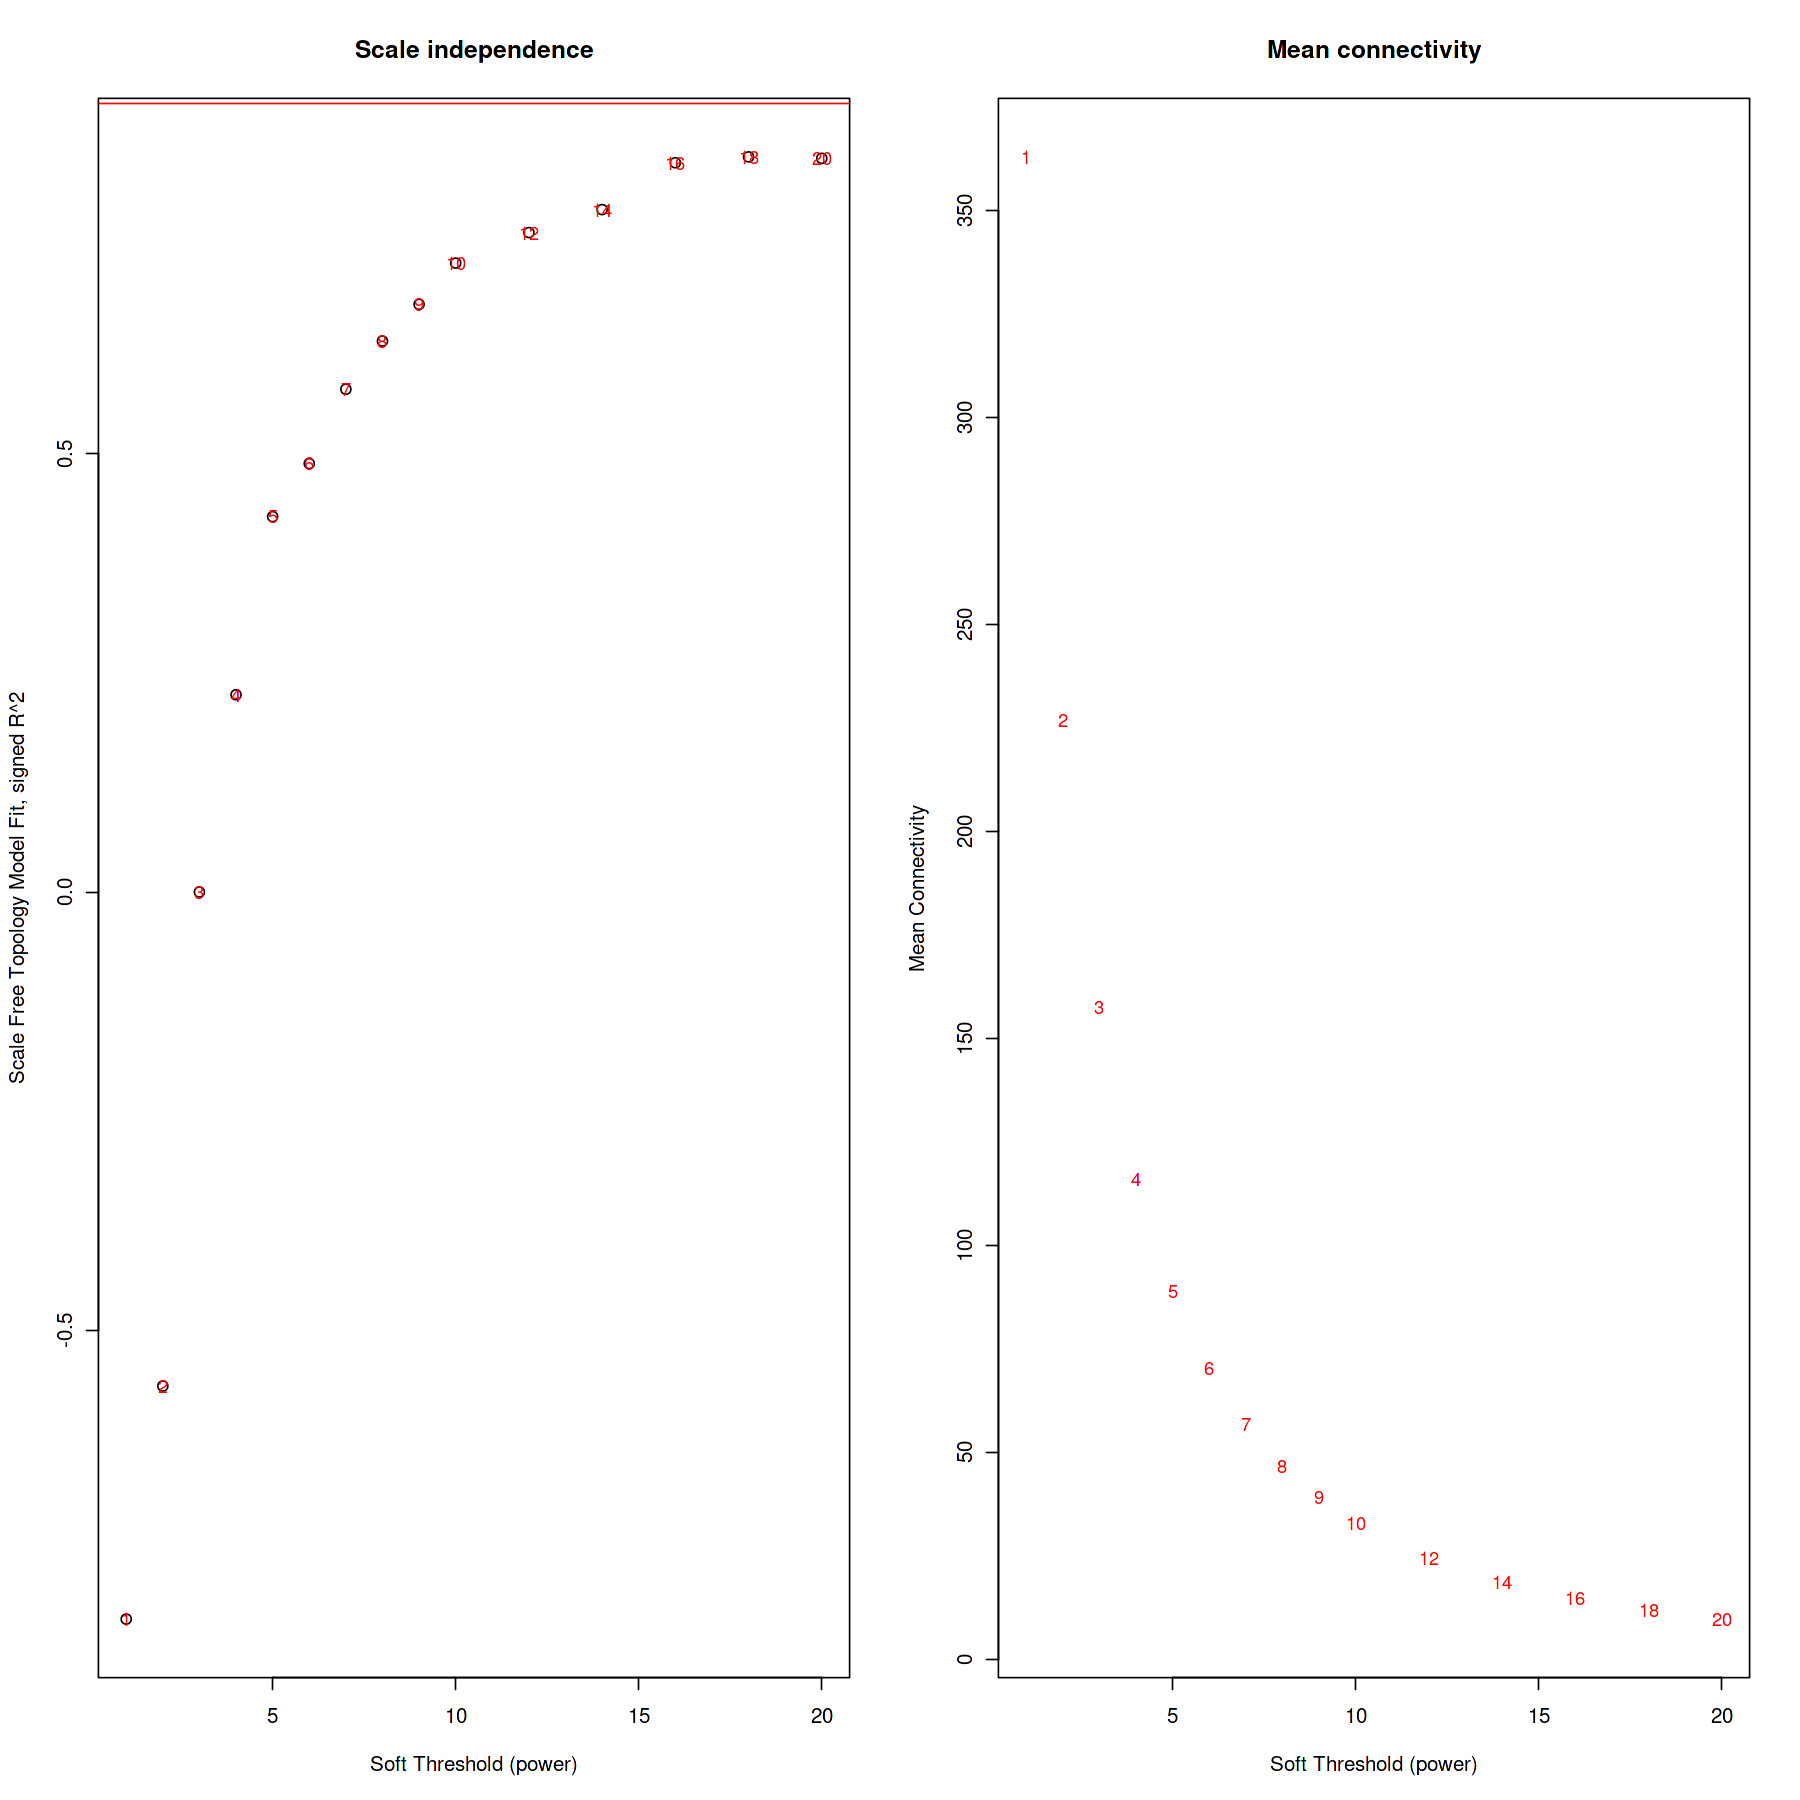

In [84]:
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow = c(1,2));
cex1 = 0.9;
plot(sft$fitIndices[, 1],
     -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
     xlab = "Soft Threshold (power)",
     ylab = "Scale Free Topology Model Fit, signed R^2",
     main = paste("Scale independence")
)
text(sft$fitIndices[, 1],
     -sign(sft$fitIndices[, 3]) * sft$fitIndices[, 2],
     labels = powers, cex = cex1, col = "red"
)
abline(h = 0.90, col = "red")
plot(sft$fitIndices[, 1],
     sft$fitIndices[, 5],
     xlab = "Soft Threshold (power)",
     ylab = "Mean Connectivity",
     type = "n",
     main = paste("Mean connectivity")
)
text(sft$fitIndices[, 1],
     sft$fitIndices[, 5],
     labels = powers,
     cex = cex1, col = "red")

In [85]:
picked_power = 16

# Force it to use WGCNA cor function (fix a namespace conflict issue)
cor <- WGCNA::cor

netwk <- blockwiseModules(
    data,

    # == Adjacency Function ==
    power = picked_power,                # <= power here
    networkType = "signed",

    # == Tree and Block Options ==
    deepSplit = 2,
    pamRespectsDendro = F,
    # detectCutHeight = 0.75,
    minModuleSize = 30,
    maxBlockSize = 4000,

    # == Module Adjustments ==
    reassignThreshold = 0,
    mergeCutHeight = 0.25,

    # == TOM == Archive the run results in TOM file (saves time)
    saveTOMs = T,
    saveTOMFileBase = "ER",

    # == Output Options
    numericLabels = T,
    verbose = 3)

# Convert labels to colors for plotting
mergedColors = labels2colors(netwk$colors)
# Plot the dendrogram and the module colors underneath
options(repr.plot.width=15, repr.plot.height=8)
plotDendroAndColors(
  netwk$dendrograms[[1]],
  mergedColors[netwk$blockGenes[[1]]],
  "Module colors",
  dendroLabels = FALSE,
  hang = 0.03,
  addGuide = TRUE,
  guideHang = 0.05 )


 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 32 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file ER-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 6 genes from module 1 because their KME is too low.
     ..removing 9 genes from module 2 because their KME is too low.
     ..removing 3 genes from module 3 because their KME is too low.
     ..removing 2 genes from module 4 because their KME is too low.
     ..removing 2 genes from module 5 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.25
       Calcu

In [86]:
module_df <- data.frame(
  gene_id = names(netwk$colors),
  colors = labels2colors(netwk$colors)
)

write_delim(module_df,
            file = "../data/gene_modules.txt",
            delim = "\t")

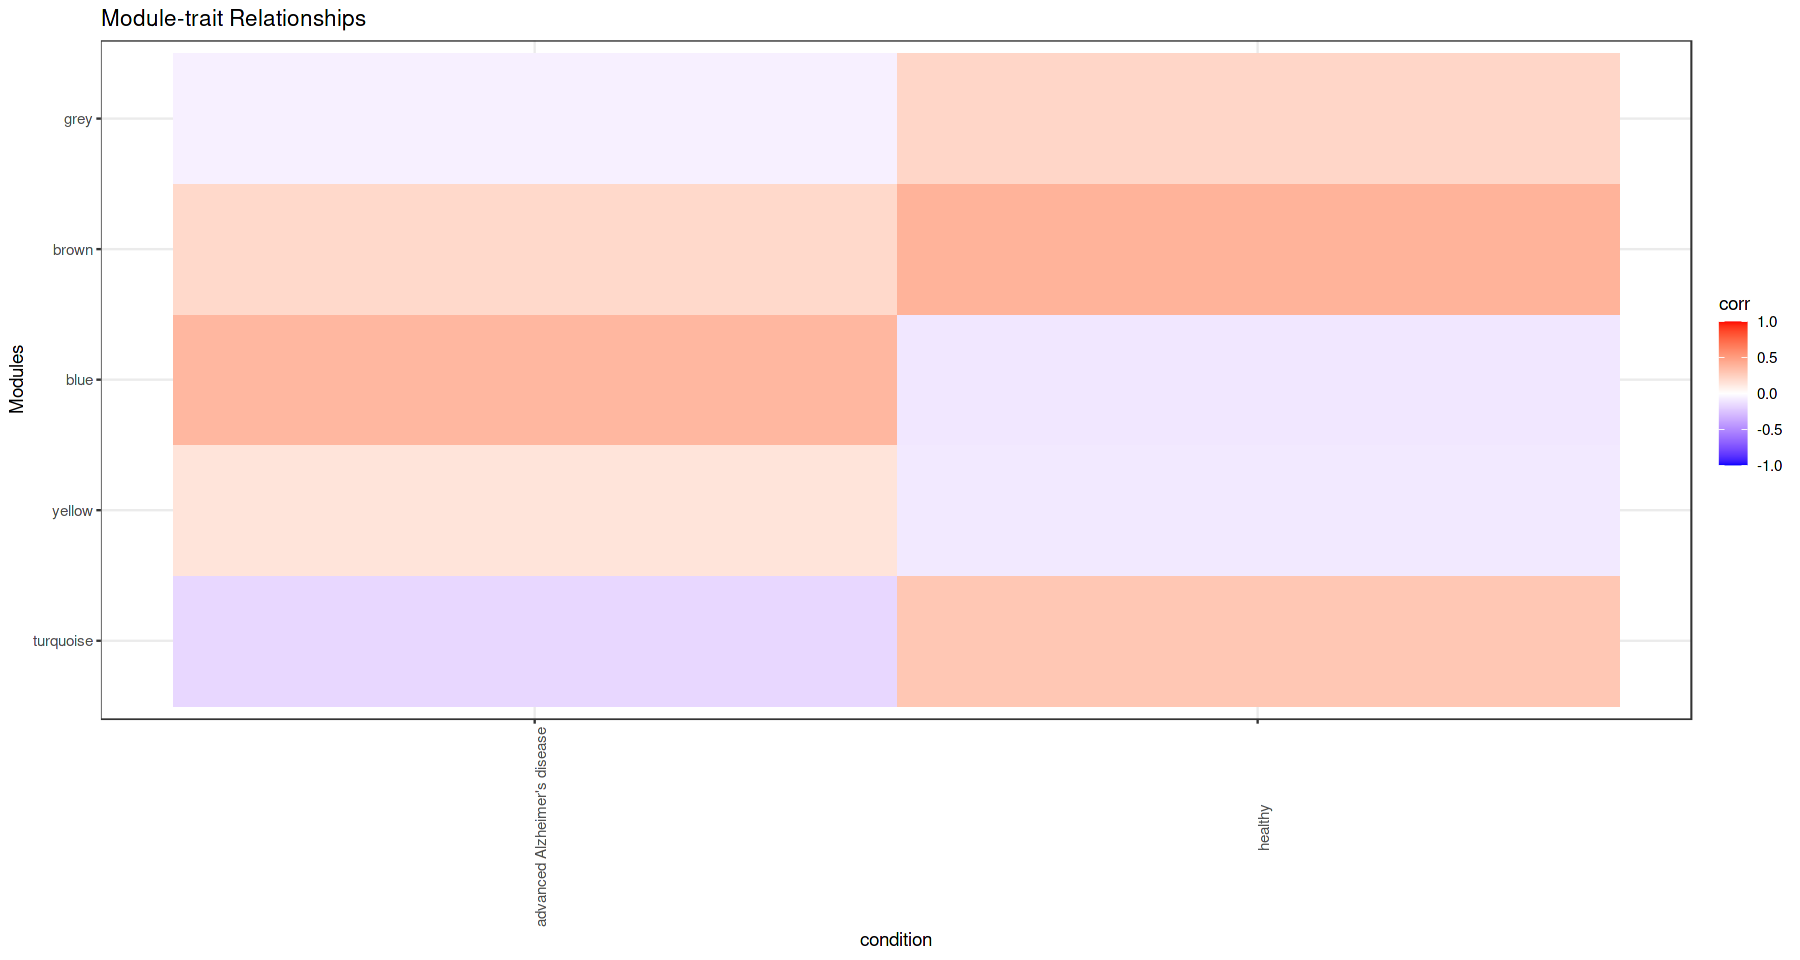

In [87]:
# Get Module Eigengenes per cluster
MEs0 <- moduleEigengenes(data, mergedColors)$eigengenes

# Reorder modules so similar modules are next to each other
MEs0 <- orderMEs(MEs0)
module_order = names(MEs0) %>% gsub("ME","", .)

# Add treatment names
MEs0$treatment = row.names(MEs0)

# tidy & plot data
mME = MEs0 %>%
  pivot_longer(-treatment) %>%
  mutate(
    name = gsub("ME", "", name),
    name = factor(name, levels = module_order)
  )
mME$condition <- sampleInfo[mME$treatment,]$condition
mME %>% ggplot(., aes(x=condition, y=name, fill=value)) +
  geom_tile() +
  theme_bw() +
  scale_fill_gradient2(
    low = "blue",
    high = "red",
    mid = "white",
    midpoint = 0,
    limit = c(-1,1)) +
  theme(axis.text.x = element_text(angle=90)) +
  labs(title = "Module-trait Relationships", y = "Modules", fill="corr")


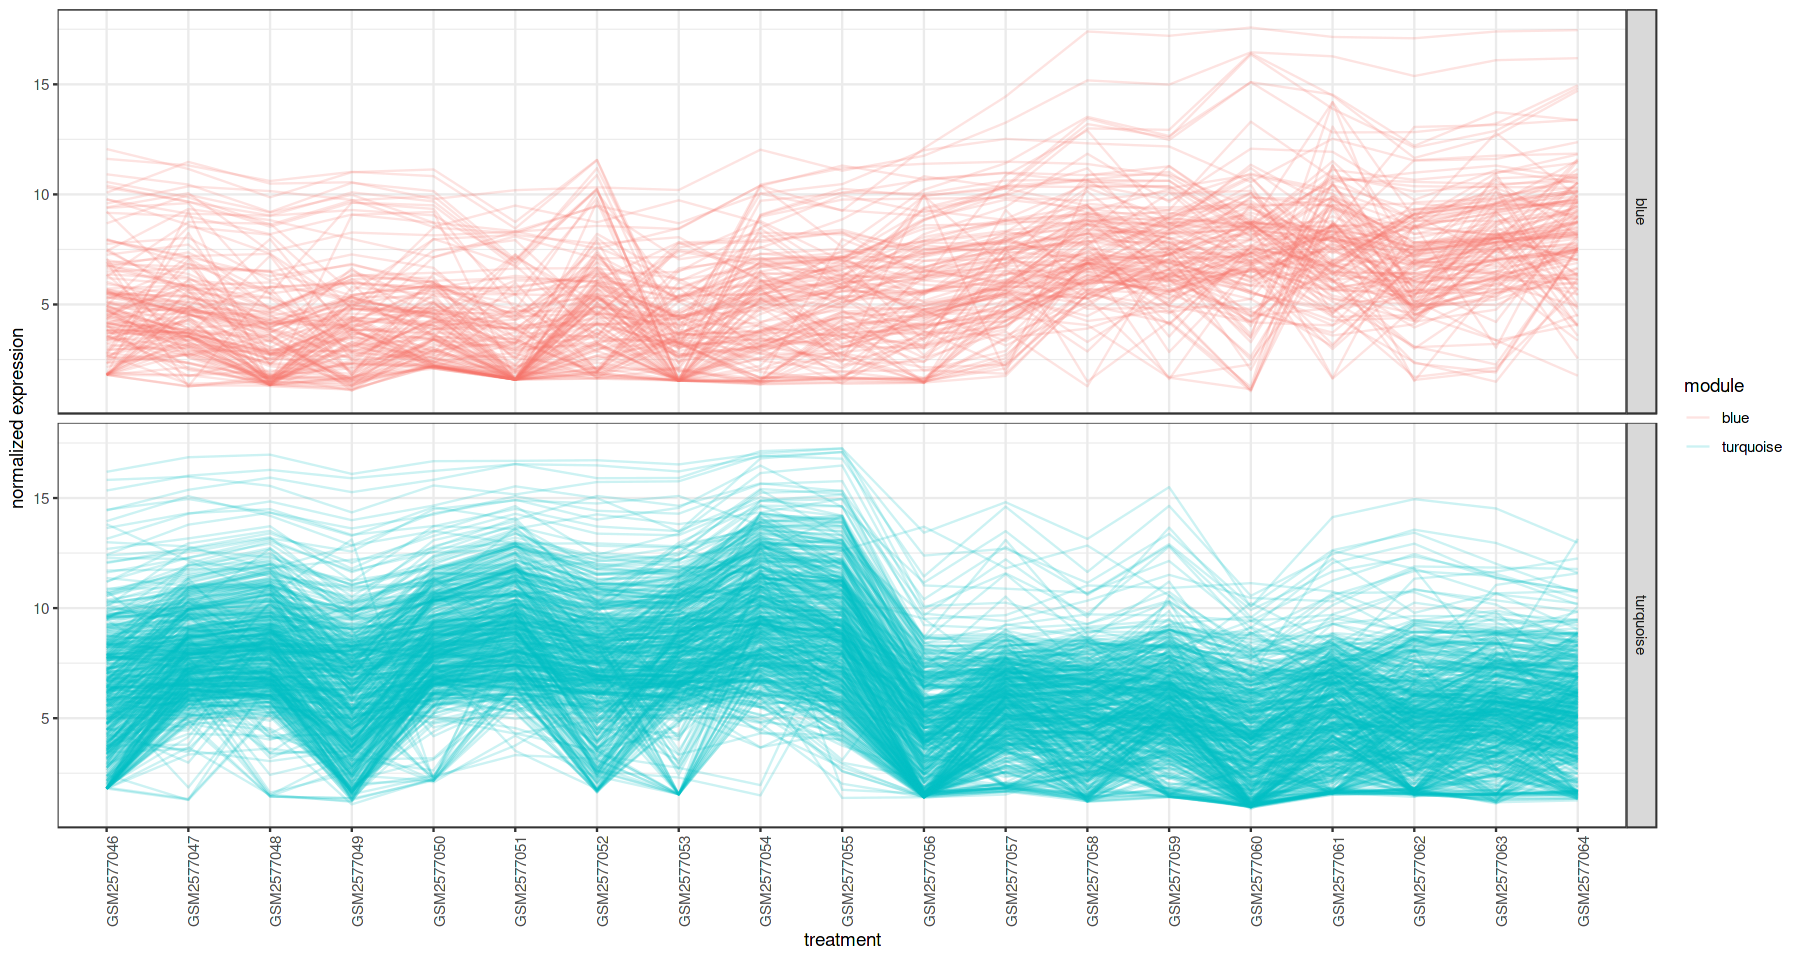

In [88]:
# pick out a few modules of interest here
modules_of_interest = c("green", "turquoise", "blue")

# Pull out list of genes in that module
submod = module_df %>%
  subset(colors %in% modules_of_interest)

row.names(module_df) = module_df$gene_id

# Get normalized expression for those genes
subexpr = expr_normalized[submod$gene_id,]

submod_df = data.frame(subexpr) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  pivot_longer(-gene_id) %>%
  mutate(
    module = module_df[gene_id,]$colors
  )

submod_df %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "treatment",
       y = "normalized expression")

In [89]:
# pick out a few modules of interest here
modules_of_interest = c("green", "turquoise", "blue")

# Pull out list of genes in that module
submod = module_df %>%
  subset(colors %in% modules_of_interest)

row.names(module_df) = module_df$gene_id

# Get normalized expression for those genes
subexpr = expr_normalized[submod$gene_id,]

submod_df = data.frame(subexpr) %>%
  mutate(
    gene_id = row.names(.)
  ) %>%
  pivot_longer(-gene_id) %>%
  mutate(
    module = module_df[gene_id,]$colors
  )

submod_df$name <- sampleInfo[submod_df$name,]$condition
submod_df %>% ggplot(., aes(x=name, y=value, group=gene_id)) +
  geom_line(aes(color = module),
            alpha = 0.2) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 90)
  ) +
  facet_grid(rows = vars(module)) +
  labs(x = "treatment",
       y = "normalized expression")

In [90]:
genes_of_interest = module_df %>%
  subset(colors %in% modules_of_interest)

expr_of_interest = expr_normalized[genes_of_interest$gene_id,]

# Only recalculate TOM for modules of interest (faster, altho there's some online discussion if this will be slightly off)
TOM = TOMsimilarityFromExpr(t(expr_of_interest),
                            power = picked_power)

# Add gene names to row and columns
row.names(TOM) = row.names(expr_of_interest)
colnames(TOM) = row.names(expr_of_interest)

edge_list = data.frame(TOM) %>%
  mutate(
    gene1 = row.names(.)
  ) %>%
  pivot_longer(-gene1) %>%
  dplyr::rename(gene2 = name, correlation = value) %>%
  unique() %>%
  subset(!(gene1==gene2)) %>%
  mutate(
    module1 = module_df[gene1,]$colors,
    module2 = module_df[gene2,]$colors
  )

head(edge_list)

# Export Network file to be read into Cytoscape, VisANT, etc
write_delim(edge_list,
            file = "../data/edgelist.tsv",
            delim = "\t")

TOM calculation: adjacency..
..will use 32 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


gene1 gene2       correlation  module1   module2  
1 DST   PROSC       4.618986e-08 turquoise blue     
2 DST   XLOC_008061 1.998202e-06 turquoise turquoise
3 DST   SHOX        1.330367e-04 turquoise blue     
4 DST   XLOC_014215 9.332093e-02 turquoise turquoise
5 DST   HIST1H2AG   6.756097e-04 turquoise blue     
6 DST   MRPL30      7.440483e-07 turquoise blue

In [160]:
genes <- paste("gene",1:1000,sep="")
x <- list(
  DEG = gene_names$ID, 
  WGCNA = module_df$gene_id
)

In [161]:
library(ggvenn)
options(repr.plot.width=10, repr.plot.height=8)
ggvenn(
    x, 
    fill_color = c("#CD534CFF", "#EFC000FF", "#868686FF"),
    stroke_size = 0.5, set_name_size = 10
)

In [163]:
saveRDS(full_results, '../data/DEGsLIMMA.Rds')
saveRDS(module_df, '../data/DEGsWGCNA.Rds')

# PPI of STRING DB

In [105]:
# ah <- AnnotationHub()
# query(ah, "EnsDb.Hsapiens.v101")
# edb <- ah[["AH83216"]]
# txs <- transcripts(edb, columns = c("tx_id", "gene_name", "gene_id"))

degs <- (
    full_results 
    %>% dplyr::filter(P.Value < .01 & abs(logFC) > 1.25) 
    # %>% pull(ID)
)
length(degs[,1])

[1] 3564

In [95]:
library(STRINGdb)
string_db <- STRINGdb$new(
    version="11.5", species=9606, score_threshold=200,
    input_directory="")

In [112]:
ppi_mapped <- string_db$map( degs, "ID", removeUnmappedRows = TRUE )

In [123]:
sum(ppi_mapped$B > 5.5)

[1] 188

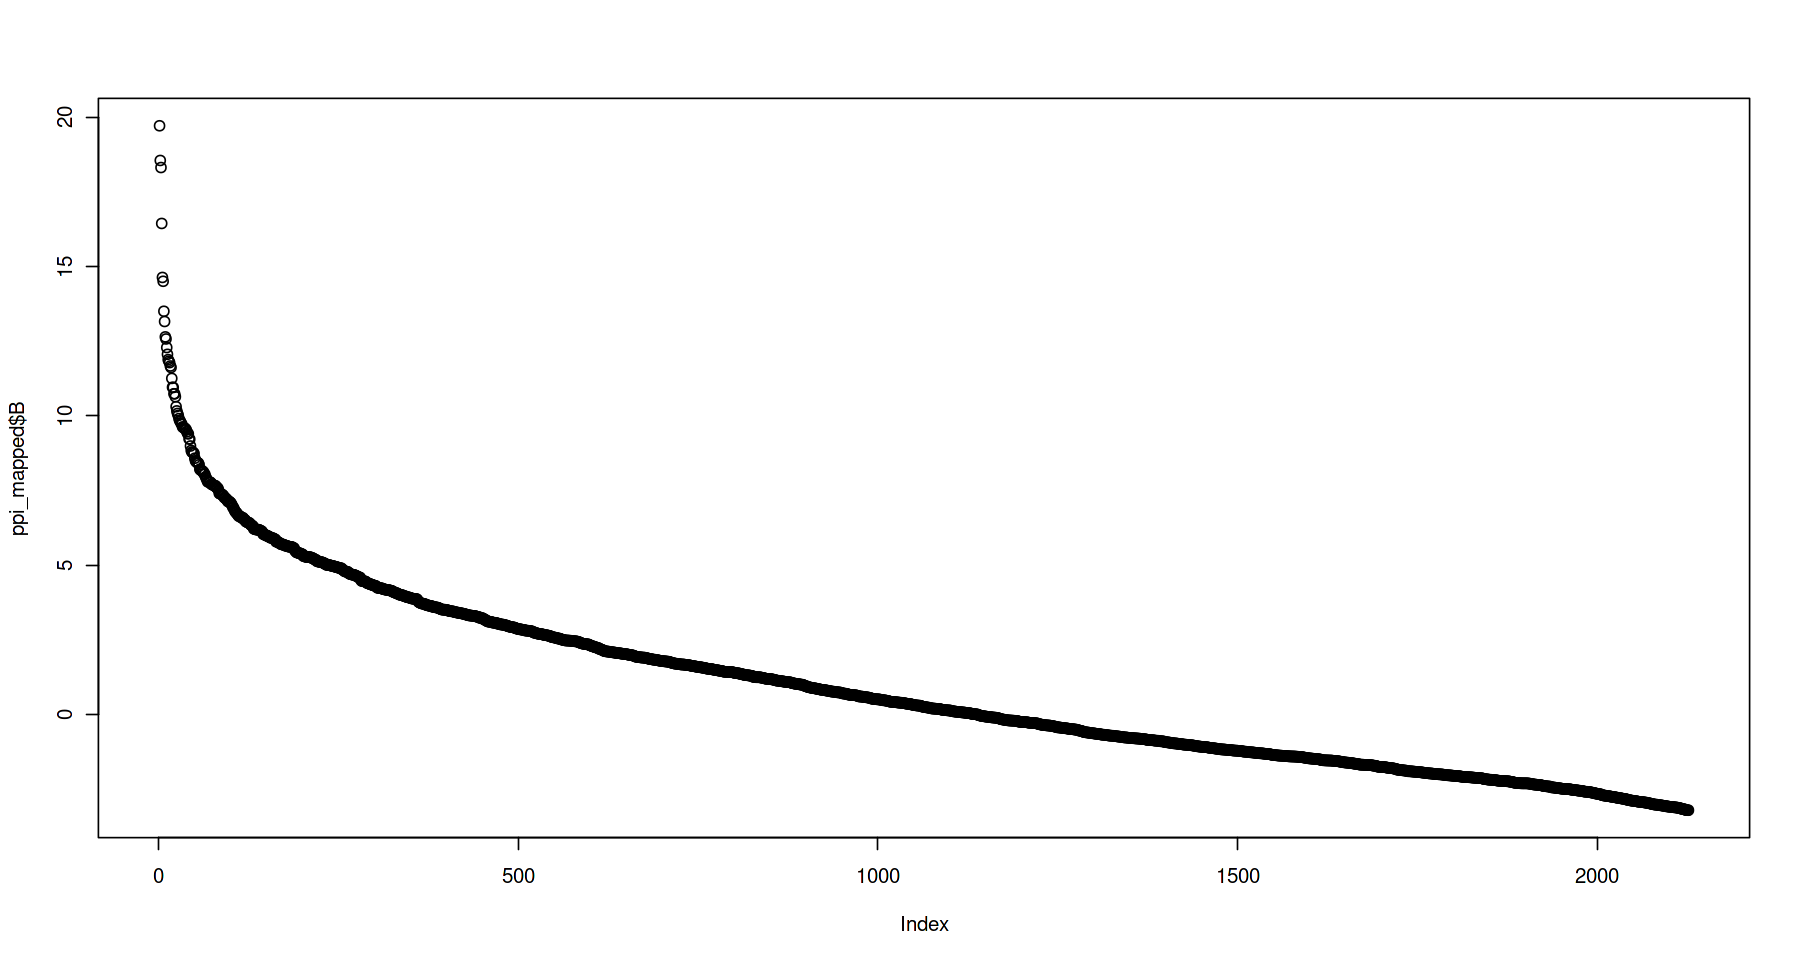

In [120]:
plot(ppi_mapped$B)

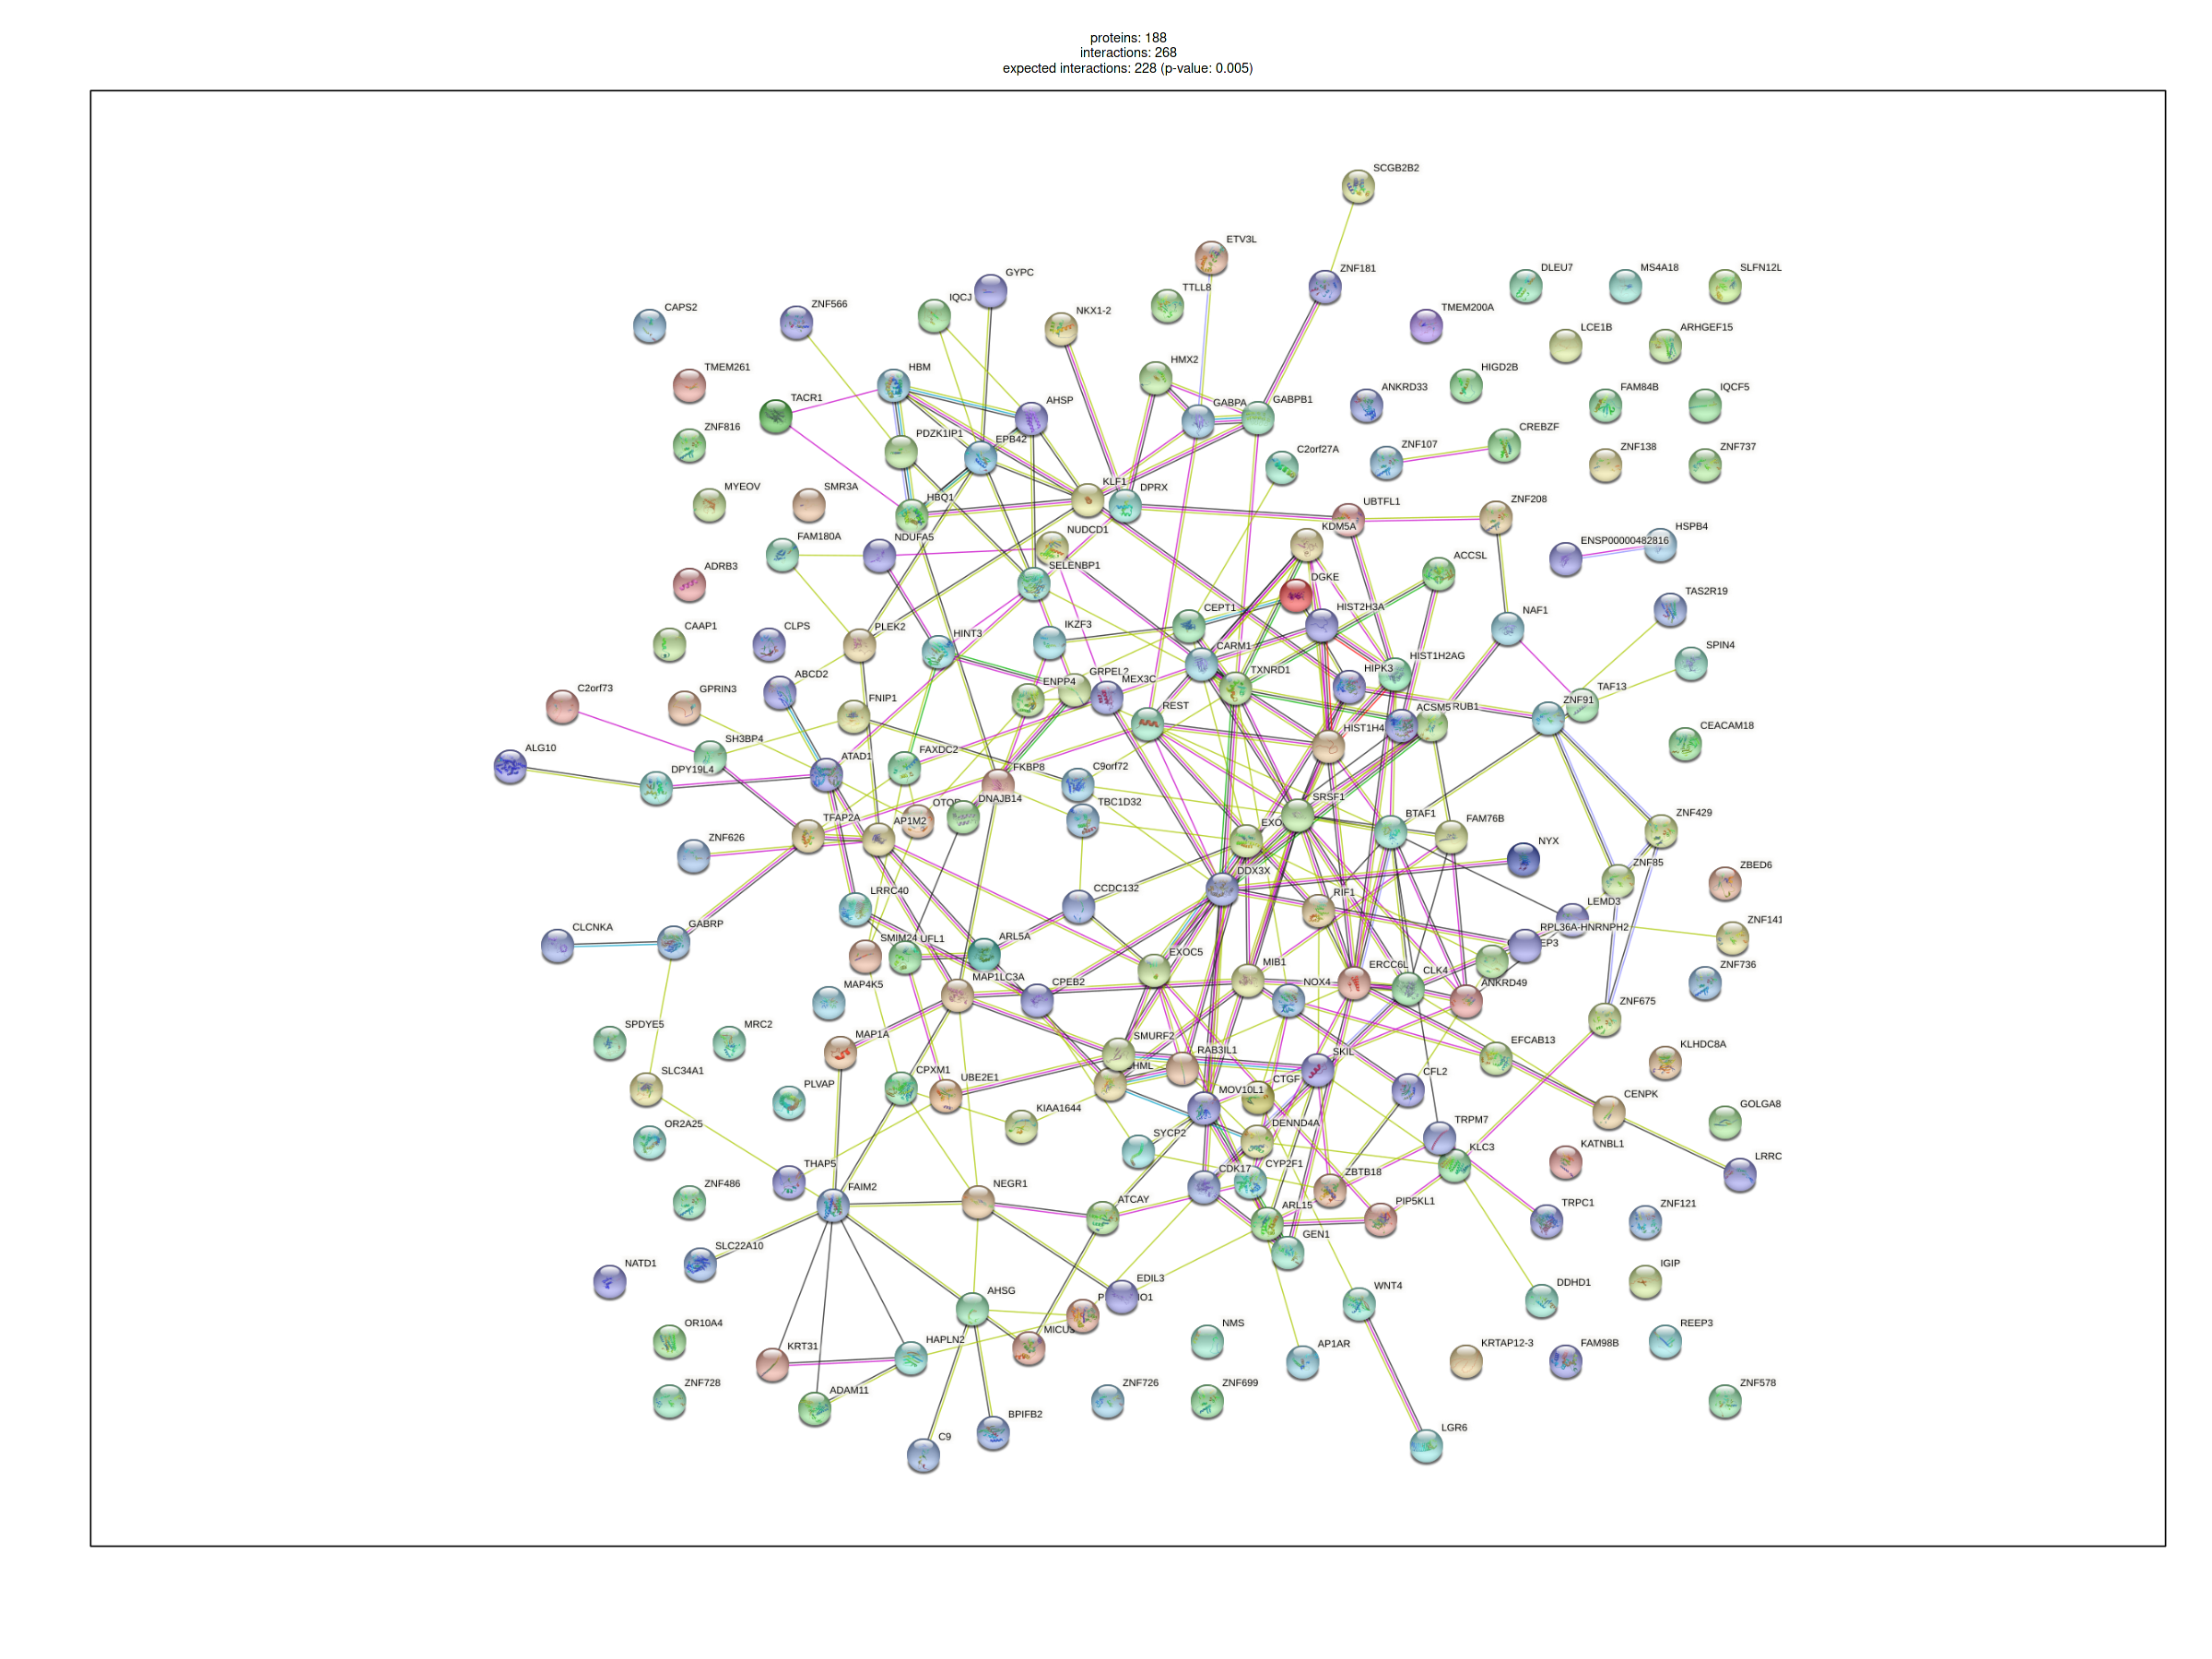

In [124]:

hits <- ppi_mapped$STRING_id[1:188]

options(repr.plot.width=20, repr.plot.height=15)
string_db$plot_network( hits )
